# Chapter 1 : Data Cleaning

> In this chapter, we will load the datasets, inspect them, handle missing values, and prepare the data for analysis.

Importing Necessary Libraries For the project

In [4]:
pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install kagglehub pmdarima xgboost lightgbm prophet

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 19.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ------------------------------------ --- 12.1/13.3 MB 58.1 MB/s eta 0:00:01
   ------------------------------------ --- 12.3/13.3 MB 59.4 MB/s eta 0:00:01
   ------------------------------------- -- 12.6/13.3 MB 24.6 MB/s eta 0:00:01
   -------------------------------------- - 12.8/13.3 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 13.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/903.1 kB ? eta -:--:--
   ---------------------------------------- 903.1/903.1 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")




In [4]:
#Followup Liberies

# libraries for time series forecasting
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates
import pmdarima as pm  # for auto_arima
from prophet import Prophet  # if needed later

# libraries for machine learning models and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import VotingRegressor, VotingClassifier

# ensemble models
import xgboost as xgb
import lightgbm as lgb

In [5]:
import kagglehub

# Download the latest version of the dataset "andrewmvd/sp-500-stocks"
path = kagglehub.dataset_download("andrewmvd/sp-500-stocks")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\Ismail Touati\.cache\kagglehub\datasets\andrewmvd\sp-500-stocks\versions\1023


In [6]:
# Section 1.3: Load the Datasets
# -------------------------------
# Define file paths based on the downloaded dataset structure.
stocks_file    = path + "/sp500_stocks.csv"
index_file     = path + "/sp500_index.csv"
companies_file = path + "/sp500_companies.csv"

# Load the CSV files into pandas DataFrames.
stocks_df    = pd.read_csv(stocks_file)
index_df     = pd.read_csv(index_file)
companies_df = pd.read_csv(companies_file)

# Display the first few rows of each DataFrame.
print("sp500_stocks DataFrame:")
print(stocks_df.head())
print("\nsp500_index DataFrame:")
print(index_df.head())
print("\nsp500_companies DataFrame:")
print(companies_df.head())

sp500_stocks DataFrame:
         Date Symbol  Adj Close  Close  High  Low  Open  Volume
0  2010-01-04    MMM        NaN    NaN   NaN  NaN   NaN     NaN
1  2010-01-05    MMM        NaN    NaN   NaN  NaN   NaN     NaN
2  2010-01-06    MMM        NaN    NaN   NaN  NaN   NaN     NaN
3  2010-01-07    MMM        NaN    NaN   NaN  NaN   NaN     NaN
4  2010-01-08    MMM        NaN    NaN   NaN  NaN   NaN     NaN

sp500_index DataFrame:
         Date   S&P500
0  2014-12-22  2078.54
1  2014-12-23  2082.17
2  2014-12-24  2081.88
3  2014-12-26  2088.77
4  2014-12-29  2090.57

sp500_companies DataFrame:
  Exchange Symbol              Shortname               Longname  \
0      NMS   AAPL             Apple Inc.             Apple Inc.   
1      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
2      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
3      NMS   AMZN       Amazon.com, Inc.       Amazon.com, Inc.   
4      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   


In [7]:
# 1.3.1: sp500_stocks Dataset

print("sp500_stocks Dataset Info:")
print(stocks_df.info())
print("\nsp500_stocks Dataset Head:")
print(stocks_df.head())

sp500_stocks Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891536 entries, 0 to 1891535
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 115.5+ MB
None

sp500_stocks Dataset Head:
         Date Symbol  Adj Close  Close  High  Low  Open  Volume
0  2010-01-04    MMM        NaN    NaN   NaN  NaN   NaN     NaN
1  2010-01-05    MMM        NaN    NaN   NaN  NaN   NaN     NaN
2  2010-01-06    MMM        NaN    NaN   NaN  NaN   NaN     NaN
3  2010-01-07    MMM        NaN    NaN   NaN  NaN   NaN     NaN
4  2010-01-08    MMM        NaN    NaN   NaN  NaN   NaN     NaN


In [8]:
print("sp500_index Dataset Info:")
print(index_df.info())
print("\nsp500_index Dataset Head:")
print(index_df.head())

sp500_index Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB
None

sp500_index Dataset Head:
         Date   S&P500
0  2014-12-22  2078.54
1  2014-12-23  2082.17
2  2014-12-24  2081.88
3  2014-12-26  2088.77
4  2014-12-29  2090.57


In [9]:
# 1.3.3: sp500_companies Dataset

print("sp500_companies Dataset Info:")
print(companies_df.info())
print("\nsp500_companies Dataset Head:")
print(companies_df.head())

sp500_companies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight    

In [10]:
# 1.4.1: Checking for Missing Values

print("Missing Values in sp500_stocks:")
print(stocks_df.isnull().sum())

print("\nMissing Values in sp500_index:")
print(index_df.isnull().sum())

print("\nMissing Values in sp500_companies:")
print(companies_df.isnull().sum())

Missing Values in sp500_stocks:
Date               0
Symbol             0
Adj Close    1273705
Close        1273705
High         1273705
Low          1273705
Open         1273705
Volume       1273705
dtype: int64

Missing Values in sp500_index:
Date      0
S&P500    0
dtype: int64

Missing Values in sp500_companies:
Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees       9
Longbusinesssummary     0
Weight                  0
dtype: int64


In [11]:
# 1.4.2: Imputing or Dropping Missing Values

# For sp500_stocks
stocks_df.dropna(inplace=True)

# For sp500_index
index_df.dropna(inplace=True)

# For sp500_companies
companies_df.dropna(inplace=True)

In [12]:
print("Missing Values in sp500_stocks:")
print(stocks_df.isnull().sum())

print("\nMissing Values in sp500_index:")
print(index_df.isnull().sum())

print("\nMissing Values in sp500_companies:")
print(companies_df.isnull().sum())

Missing Values in sp500_stocks:
Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Missing Values in sp500_index:
Date      0
S&P500    0
dtype: int64

Missing Values in sp500_companies:
Exchange               0
Symbol                 0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
State                  0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64


In [13]:
# Ensure 'Date' columns are datetime objects
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
index_df['Date'] = pd.to_datetime(index_df['Date'])

# Check data types
print("Data Types in sp500_stocks:")
print(stocks_df.dtypes)

Data Types in sp500_stocks:
Date         datetime64[ns]
Symbol               object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
dtype: object


In [14]:
# Merge datasets:
# 1. Merge sp500_stocks with sp500_companies on 'Symbol'
stocks_merged_df = pd.merge(stocks_df, companies_df, on='Symbol', how='left')
# 2. Merge the above with sp500_index on 'Date'
final_df = pd.merge(stocks_merged_df, index_df, on='Date', how='left')

print("\nFinal Merged DataFrame:")
print(final_df.head())


Final Merged DataFrame:
        Date Symbol  Adj Close     Close      High       Low      Open  \
0 2010-01-04    AOS   5.937266  7.435000  7.480000  7.261667  7.295000   
1 2010-01-05    AOS   5.861404  7.340000  7.431667  7.308333  7.431667   
2 2010-01-06    AOS   5.864068  7.343333  7.405000  7.301667  7.335000   
3 2010-01-07    AOS   5.881369  7.365000  7.425000  7.311667  7.356667   
4 2010-01-08    AOS   5.967879  7.473333  7.485000  7.311667  7.331667   

      Volume Exchange               Shortname  ...     Marketcap       Ebitda  \
0  1104600.0      NYQ  A.O. Smith Corporation  ...  9.964058e+09  809100032.0   
1  1207200.0      NYQ  A.O. Smith Corporation  ...  9.964058e+09  809100032.0   
2   663000.0      NYQ  A.O. Smith Corporation  ...  9.964058e+09  809100032.0   
3   564000.0      NYQ  A.O. Smith Corporation  ...  9.964058e+09  809100032.0   
4   504600.0      NYQ  A.O. Smith Corporation  ...  9.964058e+09  809100032.0   

  Revenuegrowth       City  State        Co

In [15]:
final_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,S&P500
0,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0,NYQ,A.O. Smith Corporation,...,9.964058e+09,8.091000e+08,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN
1,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0,NYQ,A.O. Smith Corporation,...,9.964058e+09,8.091000e+08,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN
2,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0,NYQ,A.O. Smith Corporation,...,9.964058e+09,8.091000e+08,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN
3,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0,NYQ,A.O. Smith Corporation,...,9.964058e+09,8.091000e+08,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN
4,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0,NYQ,A.O. Smith Corporation,...,9.964058e+09,8.091000e+08,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617826,2024-12-16,XYL,120.779999,120.779999,122.570000,120.000000,120.720001,1515900.0,NYQ,Xylem Inc.,...,2.845858e+10,1.689000e+09,0.013,Washington,DC,United States,23000.0,"Xylem Inc., together with its subsidiaries, en...",0.000512,6074.08
617827,2024-12-17,XYL,120.769997,120.769997,121.760002,119.730003,119.730003,2009200.0,NYQ,Xylem Inc.,...,2.845858e+10,1.689000e+09,0.013,Washington,DC,United States,23000.0,"Xylem Inc., together with its subsidiaries, en...",0.000512,6050.61
617828,2024-12-18,XYL,116.919998,116.919998,121.559998,116.879997,120.790001,1638500.0,NYQ,Xylem Inc.,...,2.845858e+10,1.689000e+09,0.013,Washington,DC,United States,23000.0,"Xylem Inc., together with its subsidiaries, en...",0.000512,5872.16
617829,2024-12-19,XYL,116.430000,116.430000,118.919998,116.129997,117.440002,1708000.0,NYQ,Xylem Inc.,...,2.845858e+10,1.689000e+09,0.013,Washington,DC,United States,23000.0,"Xylem Inc., together with its subsidiaries, en...",0.000512,5867.08


# Chapter 2: Exploratory Data Analysis (EDA)
> In this chapter, we will perform exploratory data analysis to understand the distributions, relationships, and patterns in the data.

In [16]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(final_df.describe())

Summary Statistics:
                                Date      Adj Close          Close  \
count                         617831  617831.000000  617831.000000   
mean   2017-08-28 16:17:09.205722112      79.672357      87.471540   
min              2010-01-04 00:00:00       0.203593       0.222000   
25%              2013-12-26 00:00:00      26.572459      32.700001   
50%              2017-09-27 00:00:00      49.821613      59.139999   
75%              2021-05-18 00:00:00      94.831036     105.019997   
max              2024-12-20 00:00:00    1702.530029    1702.530029   
std                              NaN     102.742931     104.521901   

                High            Low           Open        Volume  \
count  617831.000000  617831.000000  617831.000000  6.178310e+05   
mean       88.417844      86.480997      87.460302  9.347125e+06   
min         0.226250       0.216250       0.218000  0.000000e+00   
25%        33.060001      32.299999      32.689999  1.144000e+06   
50%      

Section 2.2: Visualizing Stock Prices

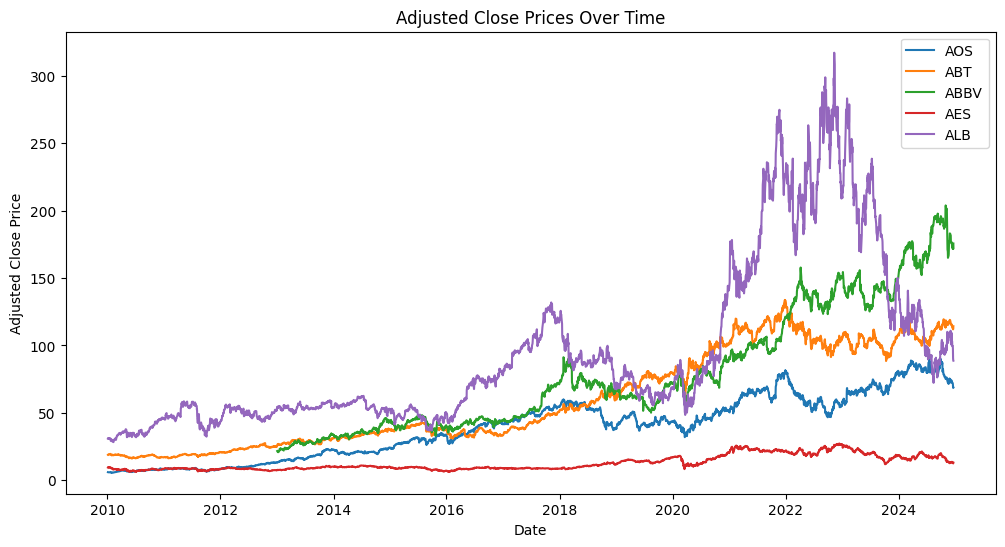

In [17]:
# 2.2.1: Time Series Plot of Adjusted Close Prices for a Sample of Stocks

# Select a sample of stocks
sample_symbols = final_df['Symbol'].unique()[:5]
sample_data = final_df[final_df['Symbol'].isin(sample_symbols)]

# Plot
plt.figure(figsize=(12,6))
for symbol in sample_symbols:
    subset = sample_data[sample_data['Symbol'] == symbol]
    plt.plot(subset['Date'], subset['Adj Close'], label=symbol)

plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

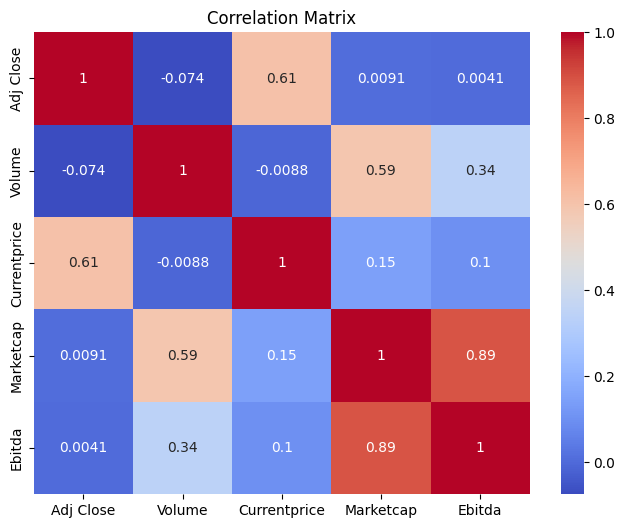

In [18]:
# Calculate correlation matrix
corr_matrix = final_df[['Adj Close', 'Volume', 'Currentprice', 'Marketcap', 'Ebitda']].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Section 2.4: Sector-wise Analysis

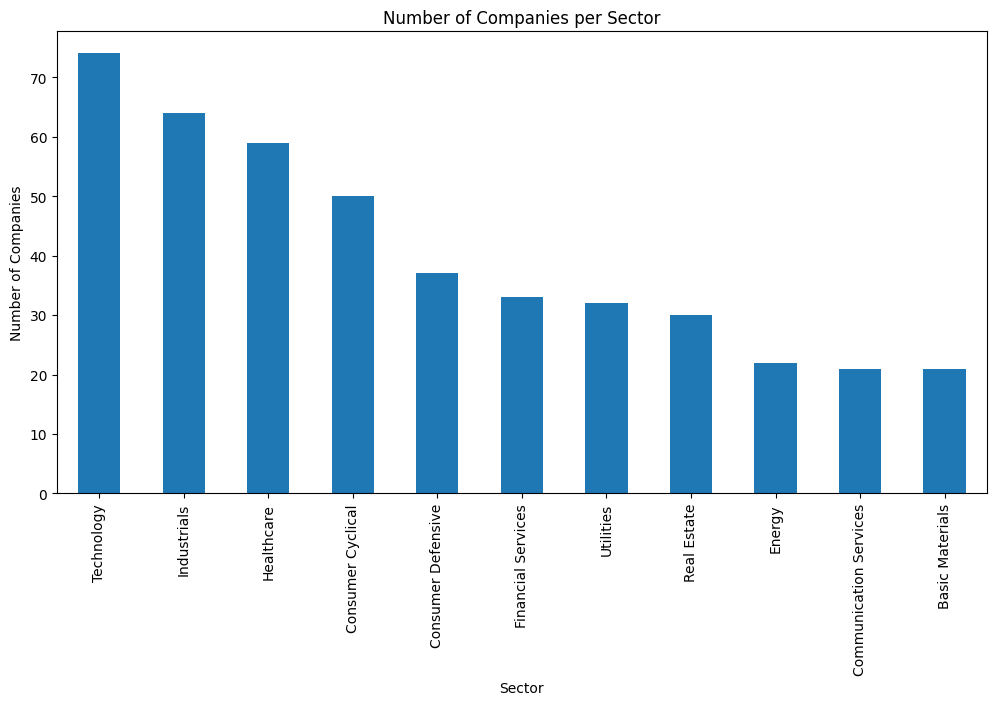

In [19]:
sector_counts = companies_df['Sector'].value_counts()

# Bar Plot
plt.figure(figsize=(12,6))
sector_counts.plot(kind='bar')
plt.title('Number of Companies per Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.show()

Section 2.5: Market Capitalization Distribution
Section 2.6: Relationship Between Stock Prices and S&P 500 Index


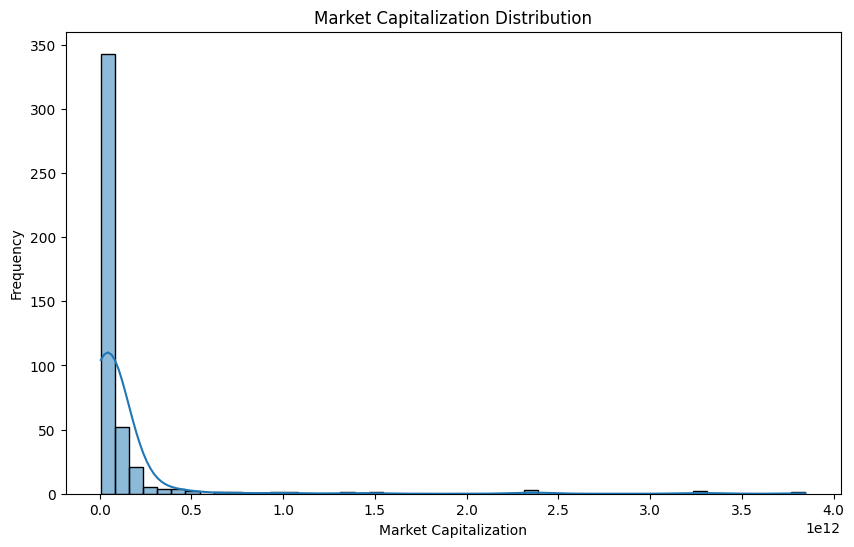

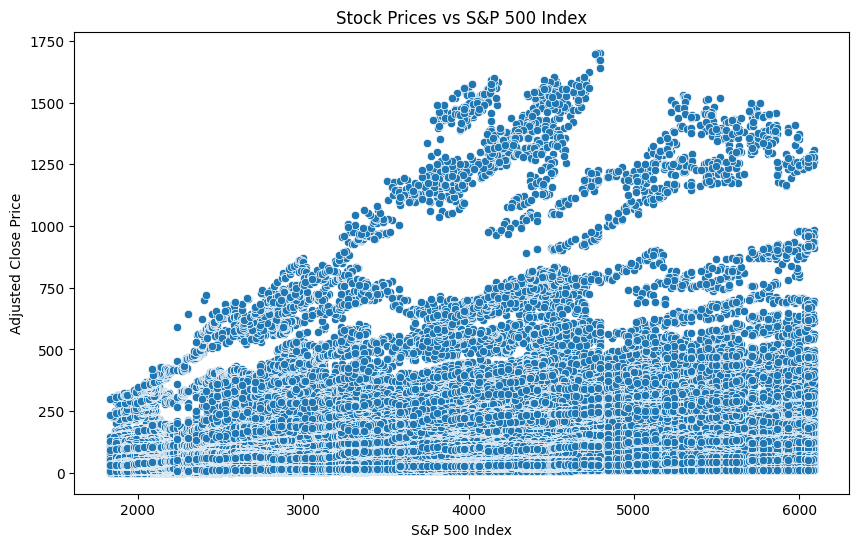

In [20]:
# Histogram of Market Capitalization
plt.figure(figsize=(10,6))
sns.histplot(companies_df['Marketcap'], bins=50, kde=True)
plt.title('Market Capitalization Distribution')
plt.xlabel('Market Capitalization')
plt.ylabel('Frequency')
plt.show()


# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=final_df, x='S&P500', y='Adj Close')
plt.title('Stock Prices vs S&P 500 Index')
plt.xlabel('S&P 500 Index')
plt.ylabel('Adjusted Close Price')
plt.show()





**Section 2.7: Time Series Analysis**

2.7.1: Decomposition of Time Series Components:

We will perform time series decomposition to analyze the trend, seasonality, and residual components of the S&P 500 Index.

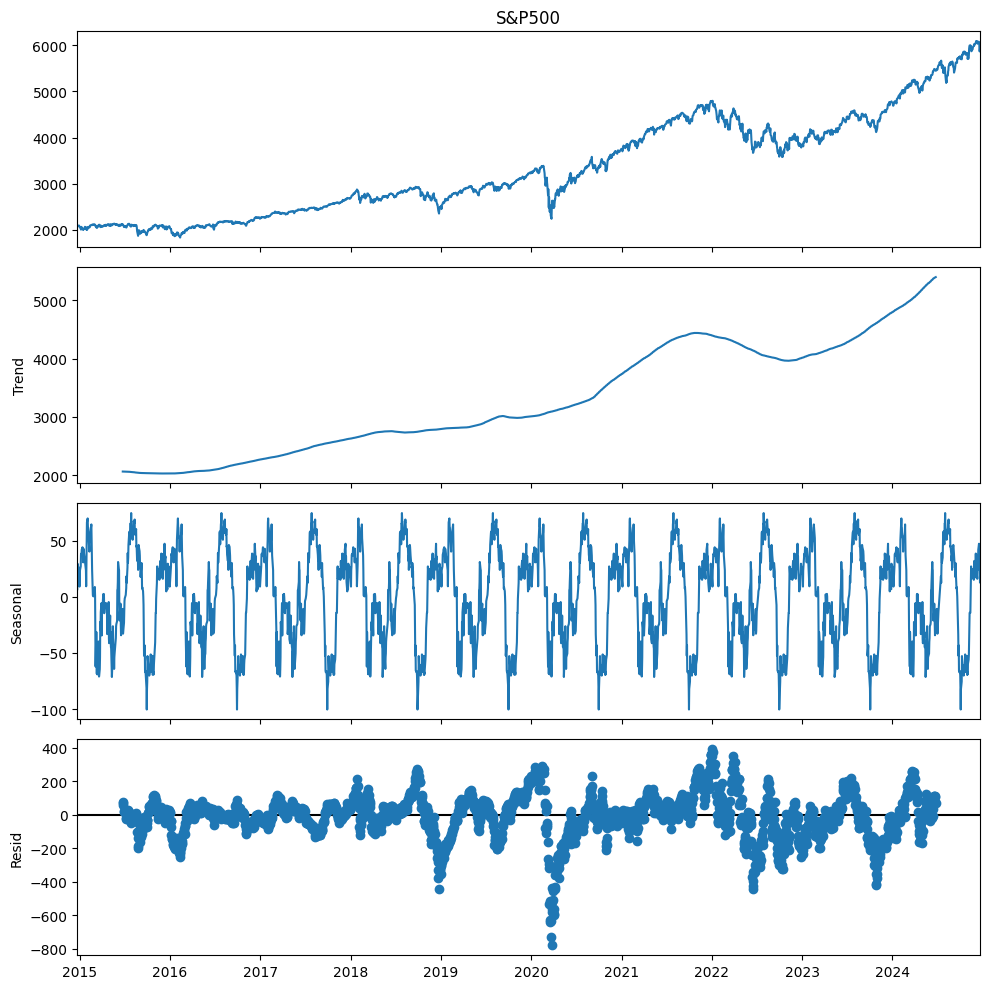

In [21]:
# Set 'Date' as index
index_df.set_index('Date', inplace=True)
index_df = index_df.sort_index()

# Perform decomposition
decomposition = seasonal_decompose(index_df['S&P500'], model='additive', period=252)  # Approximate trading days in a year

# Plot the decomposed components
plt.rcParams.update({'figure.figsize': (10,10)})
decomposition.plot()
plt.show()

2.7.2: Rolling Statistics


Calculate rolling mean and standard deviation to observe the moving average and volatility over time.

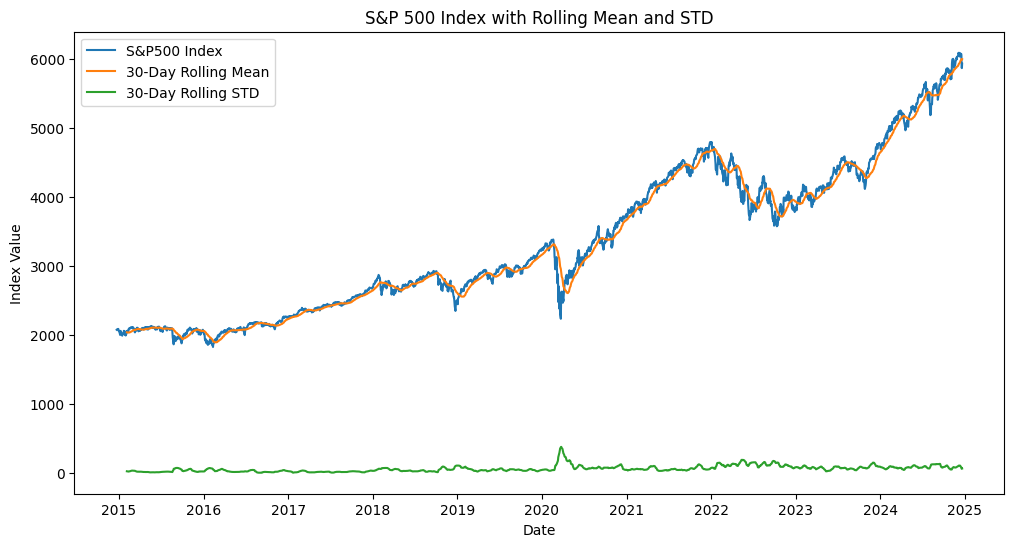

In [22]:
# Rolling mean and standard deviation
window_size = 30  # 30-day rolling window
index_df['Rolling_Mean'] = index_df['S&P500'].rolling(window=window_size).mean()
index_df['Rolling_STD'] = index_df['S&P500'].rolling(window=window_size).std()

# Plot
plt.figure(figsize=(12,6))
plt.plot(index_df['S&P500'], label='S&P500 Index')
plt.plot(index_df['Rolling_Mean'], label='30-Day Rolling Mean')
plt.plot(index_df['Rolling_STD'], label='30-Day Rolling STD')
plt.title('S&P 500 Index with Rolling Mean and STD')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()

**Section 2.8: Volatility Analysis**

Analyze the volatility of stock returns over time.

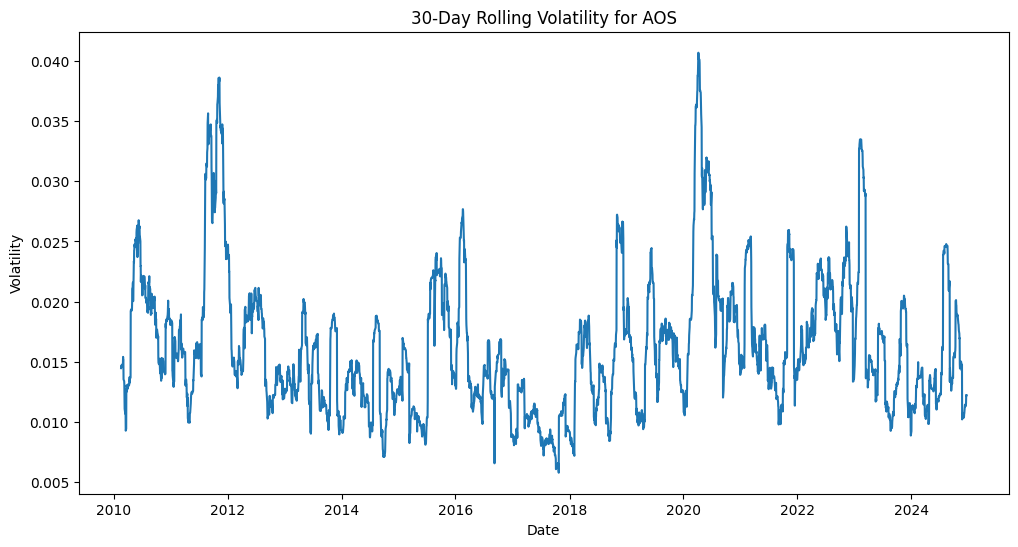

In [23]:
# Calculate daily returns
stocks_df['Daily_Return'] = stocks_df.groupby('Symbol')['Adj Close'].pct_change()

# Calculate rolling volatility (standard deviation of returns)
stocks_df['Volatility'] = stocks_df.groupby('Symbol')['Daily_Return'].rolling(window=30).std().reset_index(0, drop=True)

# Plot volatility for a sample stock
sample_symbol = stocks_df['Symbol'].unique()[0]
sample_stock = stocks_df[stocks_df['Symbol'] == sample_symbol]

plt.figure(figsize=(12,6))
plt.plot(sample_stock['Date'], sample_stock['Volatility'])
plt.title(f'30-Day Rolling Volatility for {sample_symbol}')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

**Section 2.9: Sector Performance Over Time**

Compare the performance of different sectors over time.

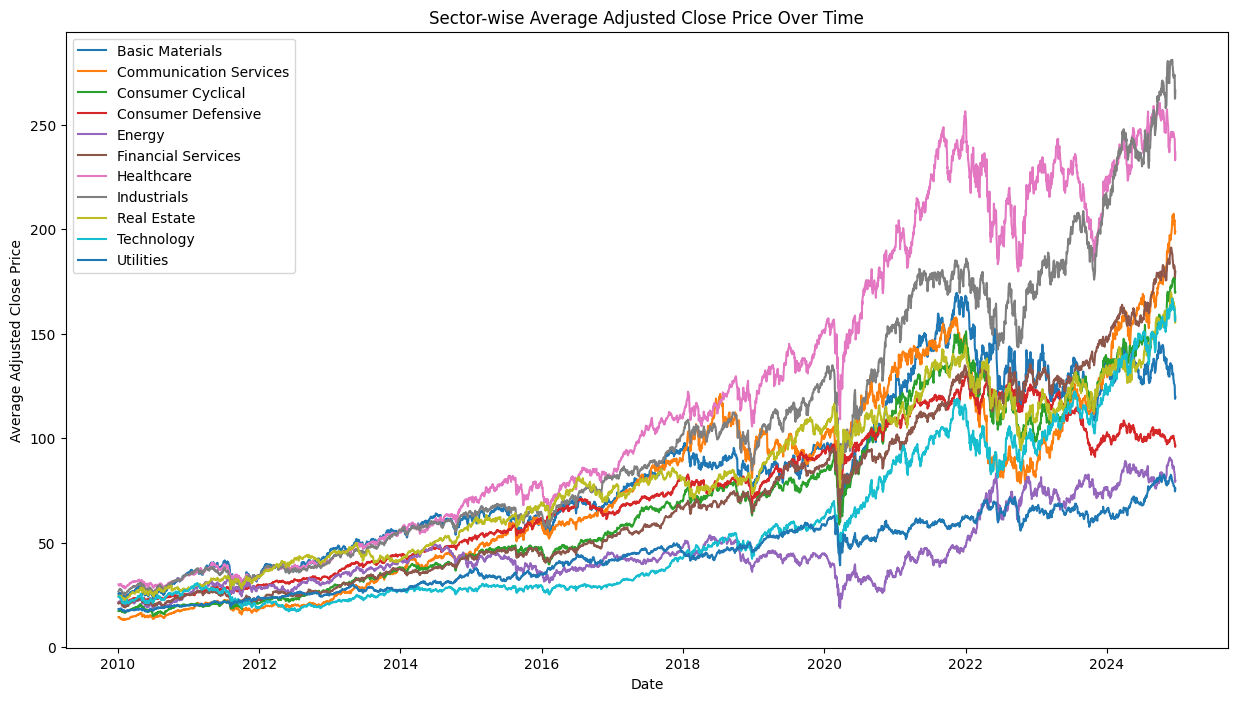

In [24]:
# Merge stocks_df with companies_df to get 'Sector'
stocks_sector_df = pd.merge(stocks_df, companies_df[['Symbol', 'Sector']], on='Symbol', how='left')

# Calculate sector-wise mean Adjusted Close price over time
sector_performance = stocks_sector_df.groupby(['Date', 'Sector'])['Adj Close'].mean().reset_index()

# Pivot the data for plotting
sector_pivot = sector_performance.pivot(index='Date', columns='Sector', values='Adj Close')

# Plot
plt.figure(figsize=(15,8))
for sector in sector_pivot.columns:
    plt.plot(sector_pivot.index, sector_pivot[sector], label=sector)

plt.title('Sector-wise Average Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Adjusted Close Price')
plt.legend()
plt.show()

**Section 2.10: Correlation Analysis Over Time**

Examine how the correlation between individual stock returns and the S&P 500 Index changes over time.

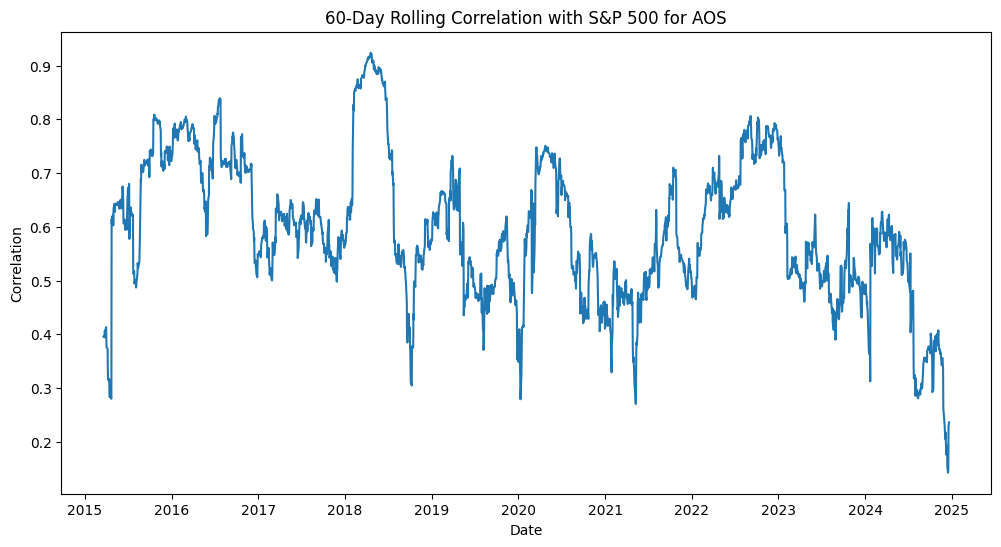

In [25]:
# Calculate stock returns and index returns
stocks_df['Stock_Return'] = stocks_df.groupby('Symbol')['Adj Close'].pct_change()
index_df['Index_Return'] = index_df['S&P500'].pct_change()

# Merge returns data
returns_df = pd.merge(stocks_df[['Date', 'Symbol', 'Stock_Return']], index_df[['Index_Return']], on='Date', how='left')

# Calculate rolling correlation
def rolling_correlation(group):
    return group['Stock_Return'].rolling(window=60).corr(group['Index_Return'])

returns_df['Rolling_Corr'] = returns_df.groupby('Symbol').apply(rolling_correlation).reset_index(level=0, drop=True)

# Plot rolling correlation for a sample stock
sample_stock = returns_df[returns_df['Symbol'] == sample_symbol]

plt.figure(figsize=(12,6))
plt.plot(sample_stock['Date'], sample_stock['Rolling_Corr'])
plt.title(f'60-Day Rolling Correlation with S&P 500 for {sample_symbol}')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.show()

**Section 2.11: Principal Component Analysis (PCA)**

Reduce dimensionality and identify key factors that explain the variance in stock returns.

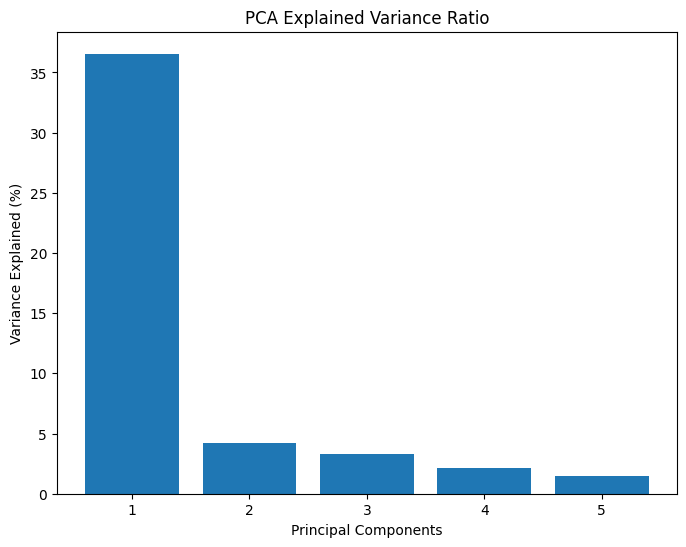

In [26]:
# Pivot the data to have dates as index and symbols as columns
returns_pivot = stocks_df.pivot(index='Date', columns='Symbol', values='Daily_Return')

# Handle missing values by filling with zeros (or use an appropriate method)
returns_pivot.fillna(0, inplace=True)

# Standardize the data
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns_pivot)

# Perform PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(returns_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8,6))
plt.bar(range(1,6), explained_variance * 100)
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.show()

**Section 2.13: Anomaly Detection in Stock Prices**

Identify unusual patterns or outliers in stock prices.

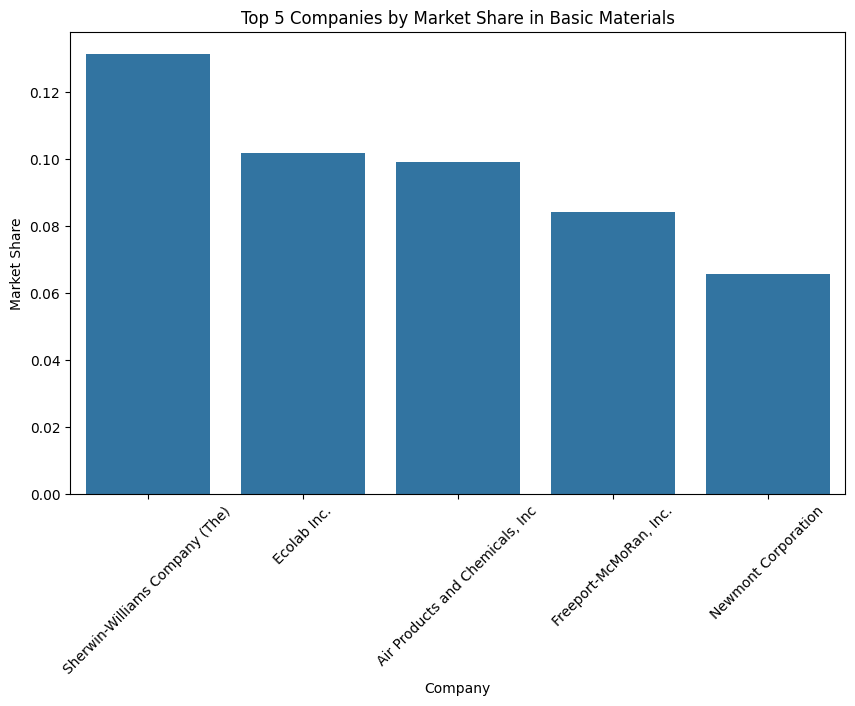

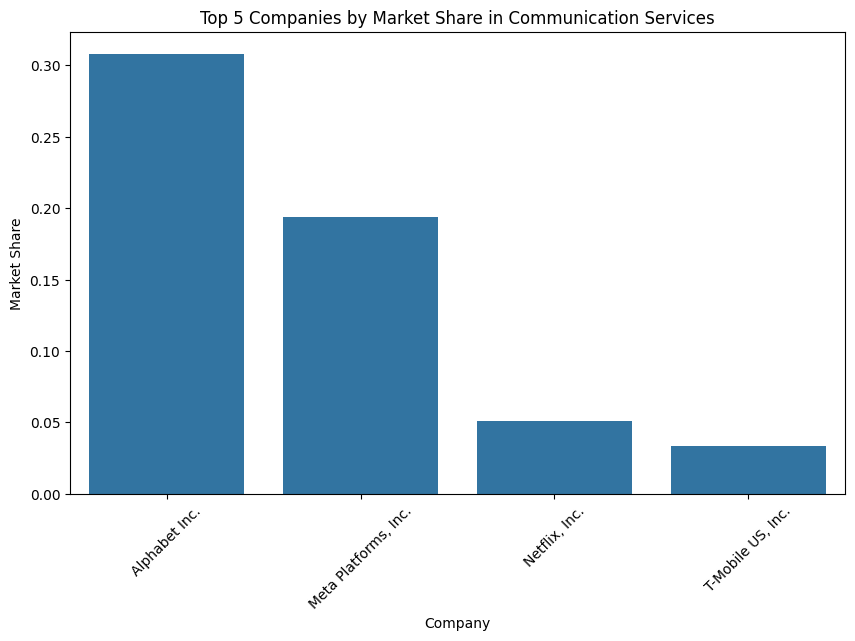

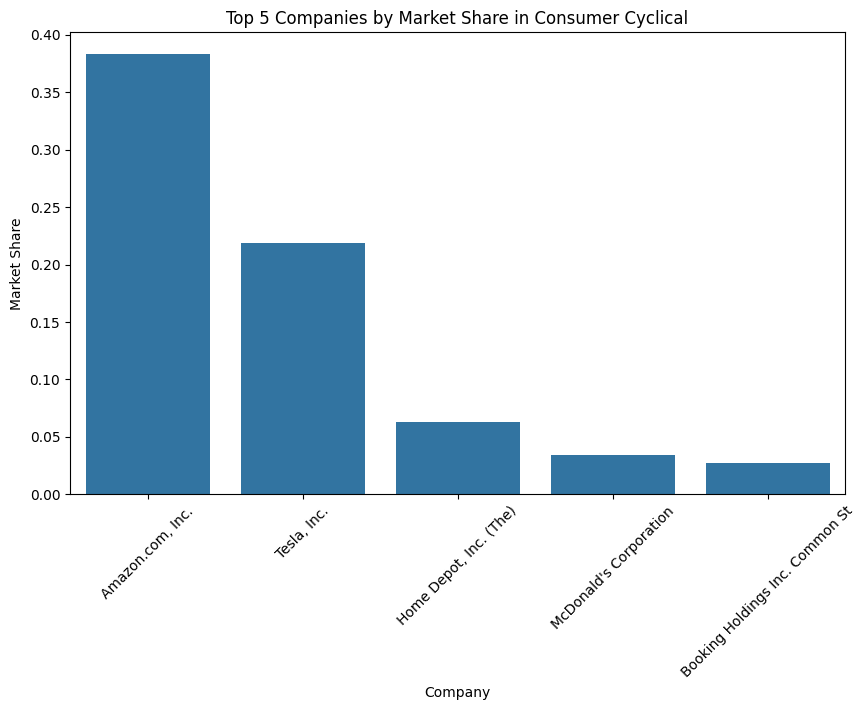

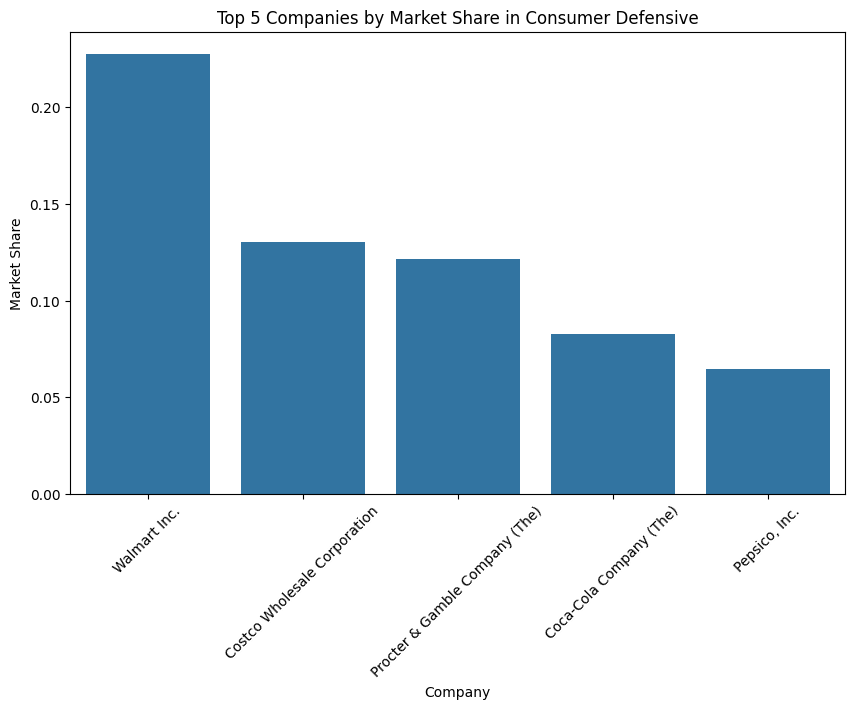

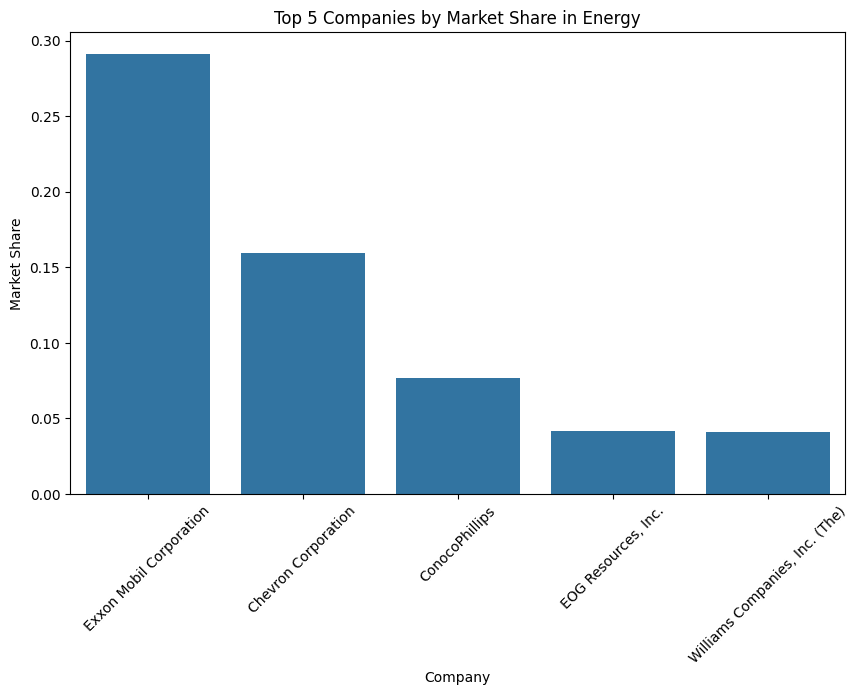

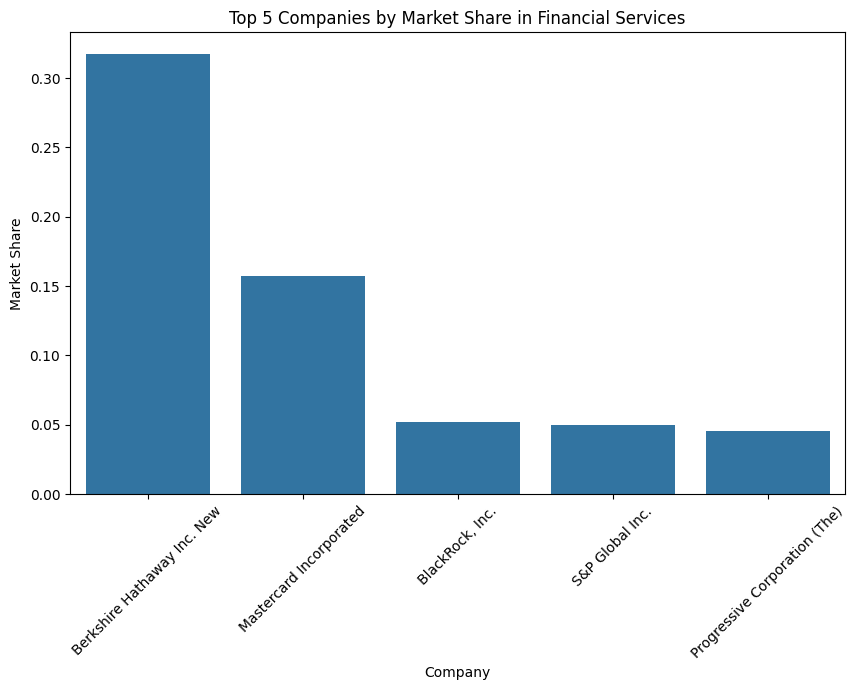

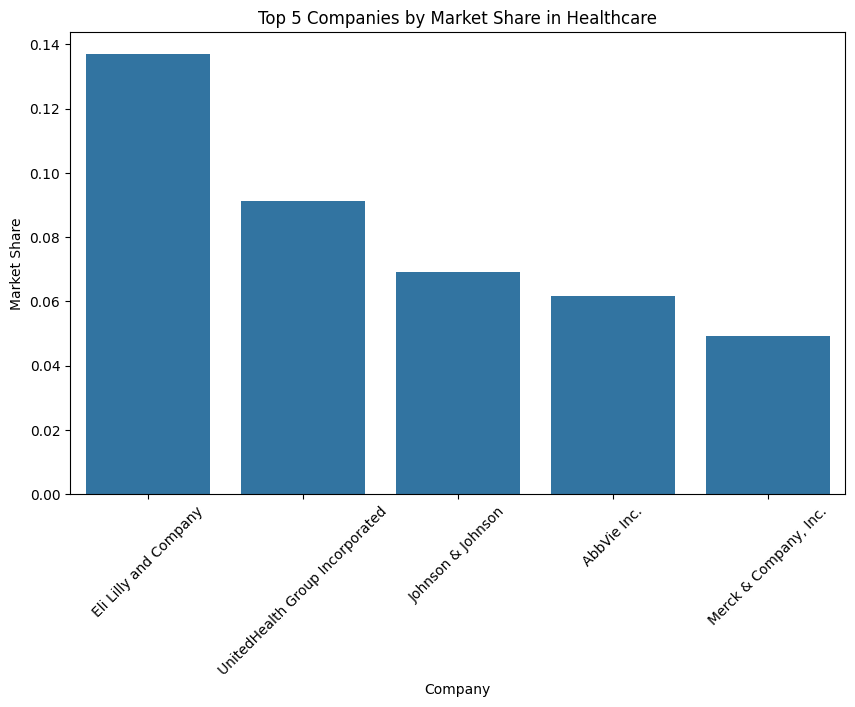

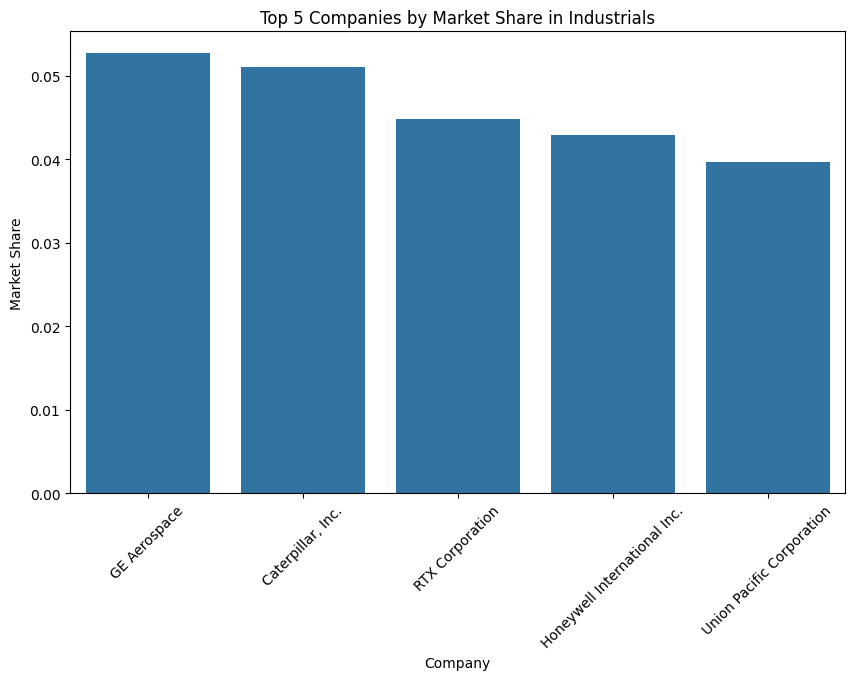

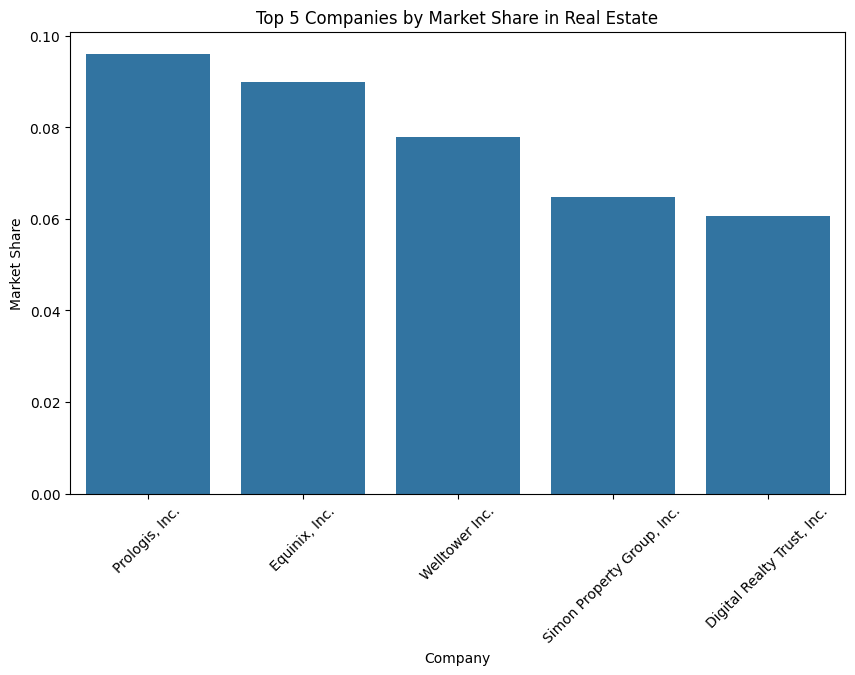

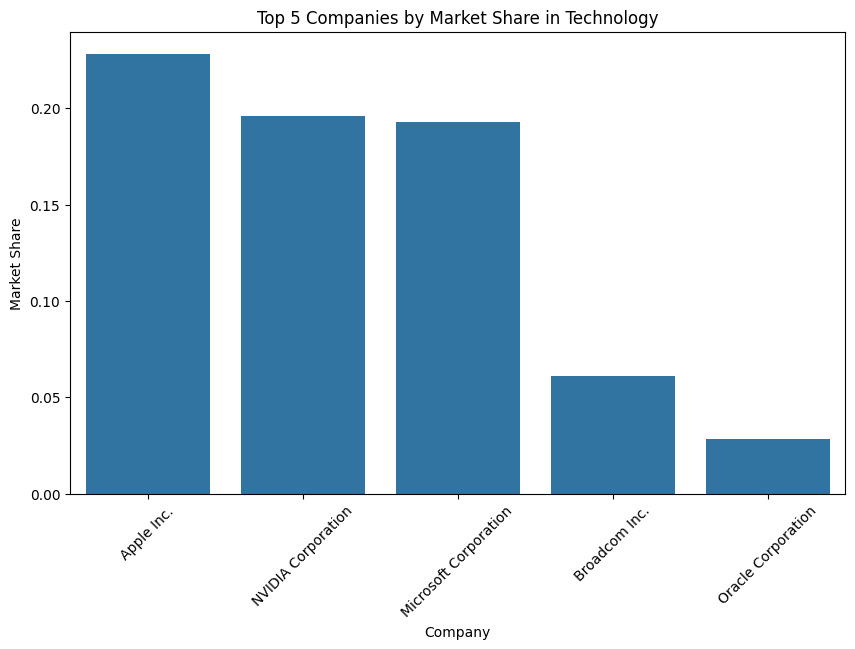

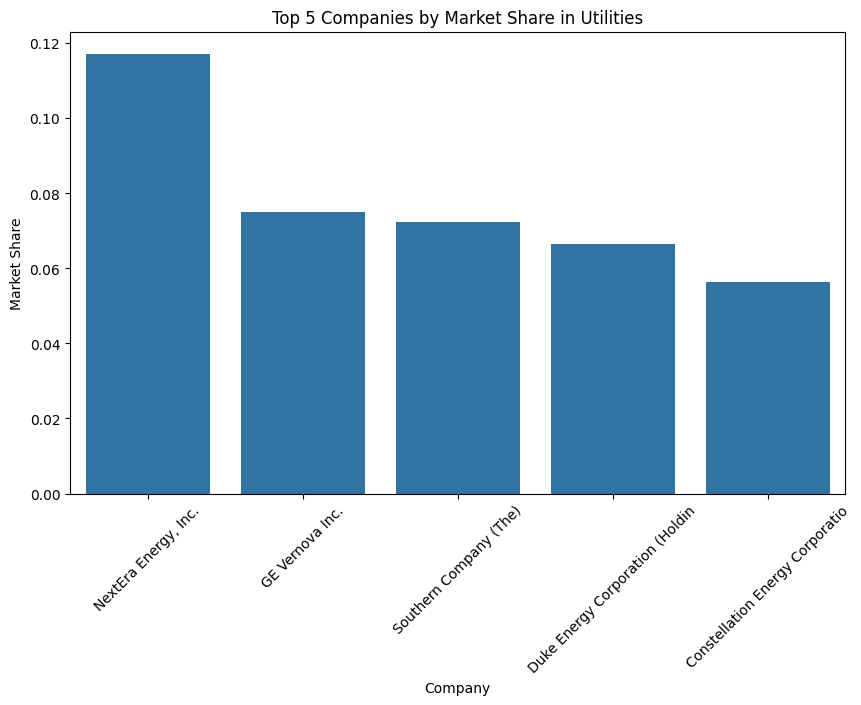

In [27]:
# Calculate total market cap per sector
sector_marketcap = companies_df.groupby('Sector')['Marketcap'].sum().reset_index()

# Merge with companies_df
companies_market_share = pd.merge(companies_df, sector_marketcap, on='Sector', suffixes=('', '_SectorTotal'))

# Calculate market share
companies_market_share['MarketShare'] = companies_market_share['Marketcap'] / companies_market_share['Marketcap_SectorTotal']

# Top companies by market share in each sector
top_market_share = companies_market_share.sort_values(['Sector', 'MarketShare'], ascending=[True, False])

# Plot top 5 companies in each sector
for sector in top_market_share['Sector'].unique():
    sector_data = top_market_share[top_market_share['Sector'] == sector].head(5)
    plt.figure(figsize=(10,6))
    sns.barplot(x='Shortname', y='MarketShare', data=sector_data)
    plt.title(f'Top 5 Companies by Market Share in {sector}')
    plt.xlabel('Company')
    plt.ylabel('Market Share')
    plt.xticks(rotation=45)
    plt.show()

#Chapter 3: Impact of US Elections on S&P 500 Index Performance
>In this chapter, we analyze the performance of the S&P 500 Index around the time of US presidential elections from 2000 to 2020. We examine the index's behavior 30 days before and after each election date to understand how elections impact the stock market.

Section 3.1: Setting Up Election Dates and Data
We will analyze the following US presidential elections:

2000: November 7, 2000
2004: November 2, 2004
2008: November 4, 2008
2012: November 6, 2012
2016: November 8, 2016
2020: November 3, 2020

In [28]:
# Ensure 'Date' is a column in index_df
if 'Date' not in index_df.columns:
    index_df.reset_index(inplace=True)

# Ensure 'Date' column is in datetime format
index_df['Date'] = pd.to_datetime(index_df['Date'])

In [29]:
# List of election dates
election_dates = {
    '2000-11-07': '2000 Election',
    '2004-11-02': '2004 Election',
    '2008-11-04': '2008 Election',
    '2012-11-06': '2012 Election',
    '2016-11-08': '2016 Election',
    '2020-11-03': '2020 Election',
    '2024-11-05': '2024 Election'
}

# Convert keys to datetime
election_dates = {pd.to_datetime(date): name for date, name in election_dates.items()}

Section 3.2: Analyzing Each Election Period
We loop through each election date, extract data 30 days before and after, and analyze the S&P 500 Index performance.

No data available for 2000 Election.
No data available for 2004 Election.
No data available for 2008 Election.
No data available for 2012 Election.


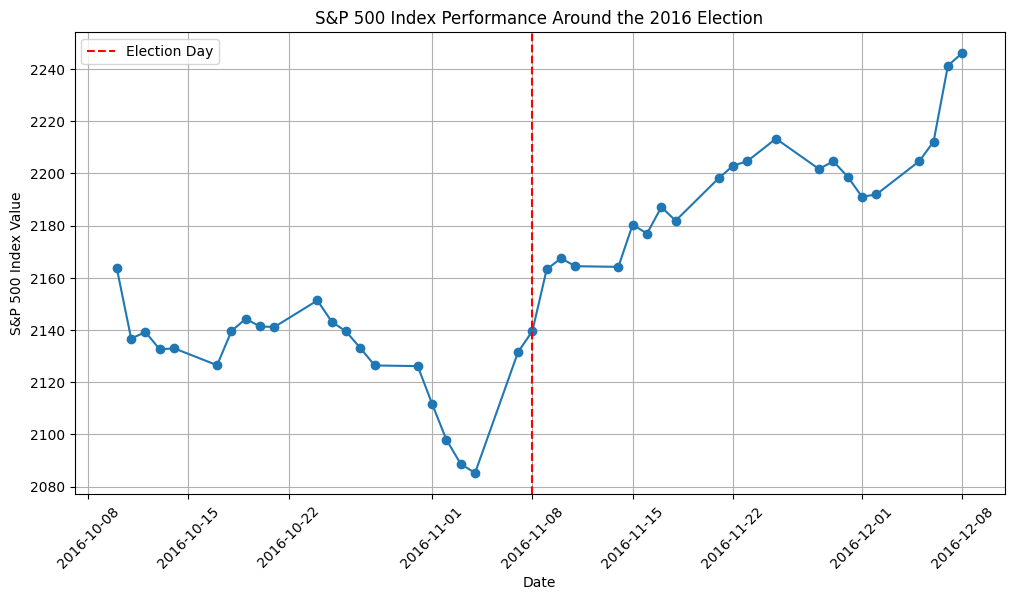

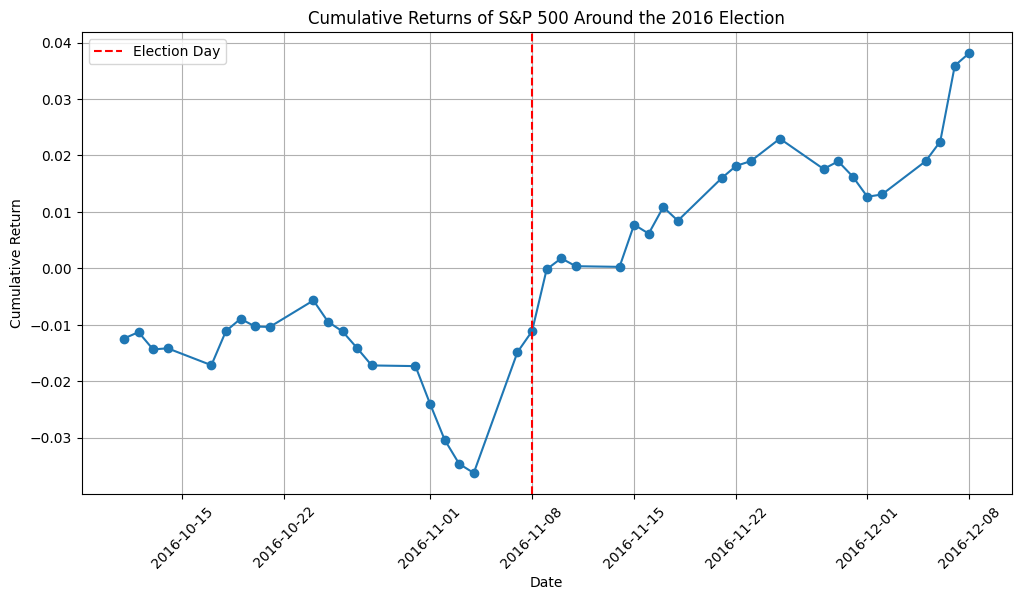

--- 2016 Election ---
30 Days Before Election:
Average Daily Return: -0.00073
Volatility (Standard Deviation): 0.00678
30 Days After Election:
Average Daily Return: 0.00233
Volatility (Standard Deviation): 0.00474



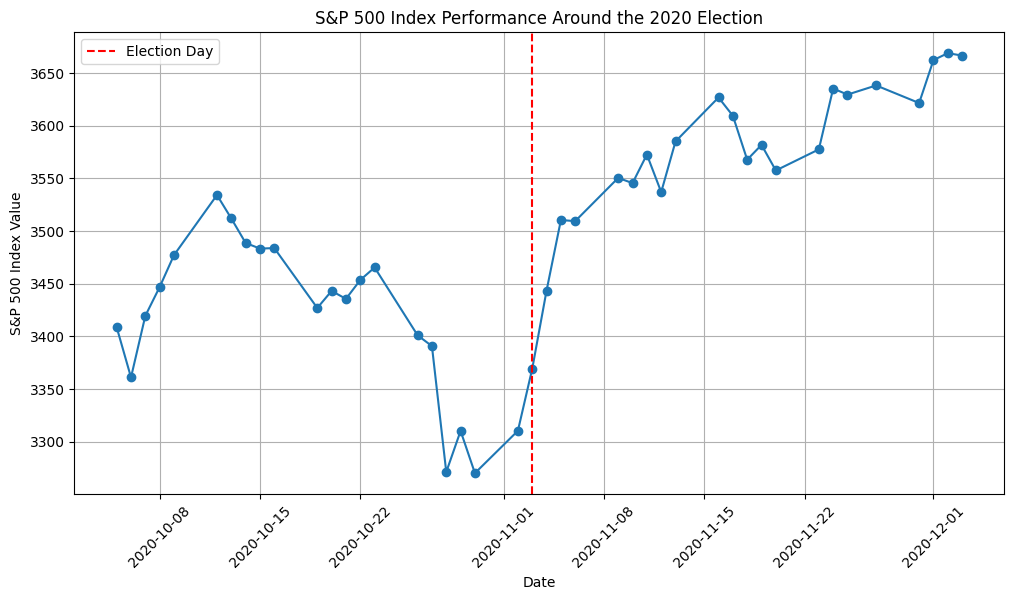

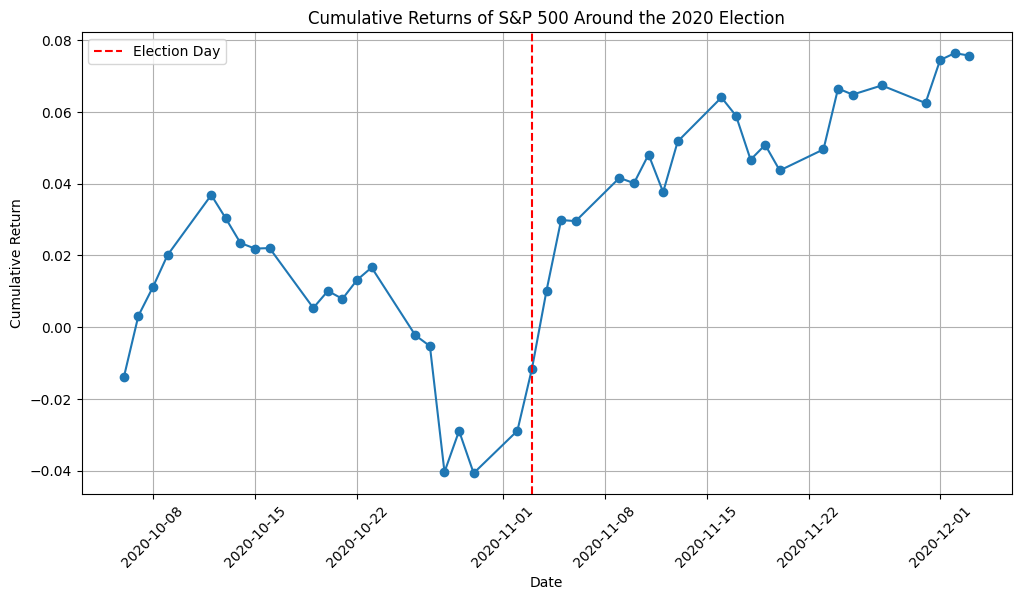

--- 2020 Election ---
30 Days Before Election:
Average Daily Return: -0.00138
Volatility (Standard Deviation): 0.01324
30 Days After Election:
Average Daily Return: 0.00408
Volatility (Standard Deviation): 0.00950



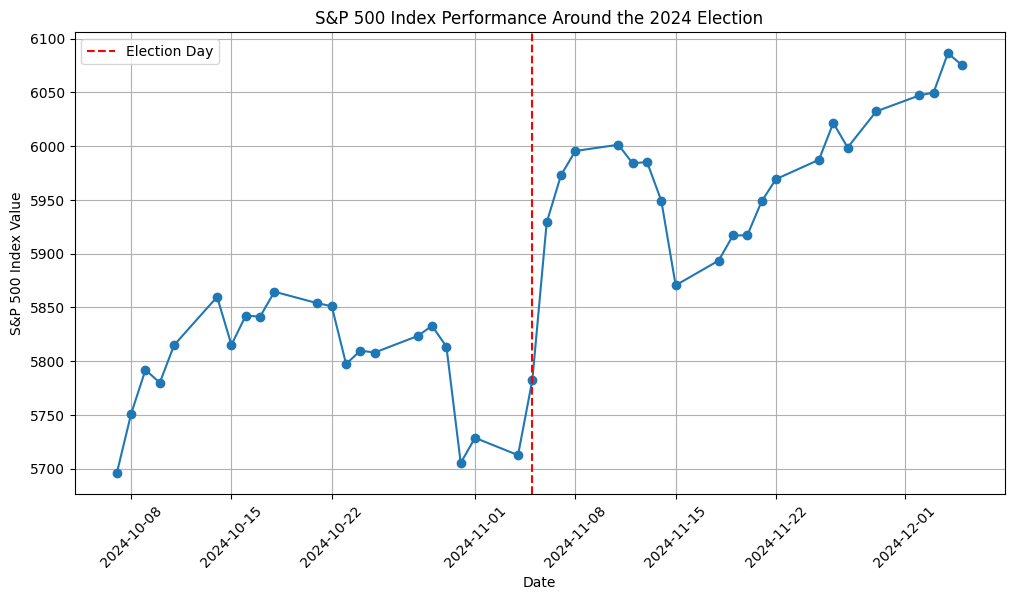

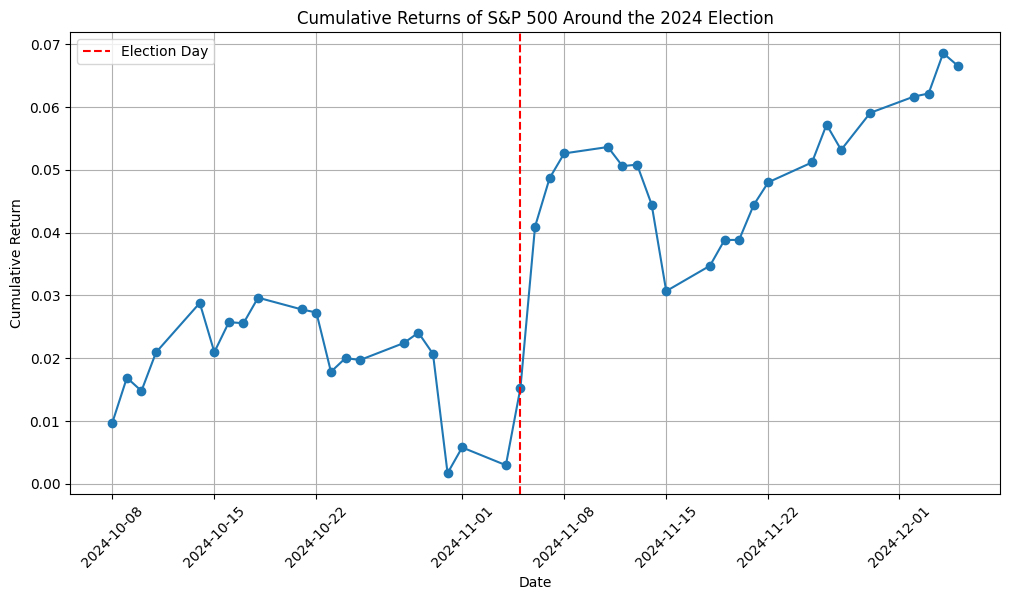

--- 2024 Election ---
30 Days Before Election:
Average Daily Return: 0.00017
Volatility (Standard Deviation): 0.00659
30 Days After Election:
Average Daily Return: 0.00238
Volatility (Standard Deviation): 0.00713



In [30]:
for election_date, election_name in election_dates.items():
    # Calculate 30 days before and after the election
    start_date = election_date - pd.Timedelta(days=30)
    end_date = election_date + pd.Timedelta(days=30)

    # Filter the index data
    election_period_df = index_df[(index_df['Date'] >= start_date) & (index_df['Date'] <= end_date)].copy()

    # Check if data is available for the election period
    if election_period_df.empty:
        print(f"No data available for {election_name}.")
        continue  # Skip to the next election

    # Sort the data by date
    election_period_df.sort_values('Date', inplace=True)

    # Plot the S&P 500 Index during the election period
    plt.figure(figsize=(12,6))
    plt.plot(election_period_df['Date'], election_period_df['S&P500'], marker='o', linestyle='-')
    plt.axvline(election_date, color='red', linestyle='--', label='Election Day')
    plt.title(f'S&P 500 Index Performance Around the {election_name}')
    plt.xlabel('Date')
    plt.ylabel('S&P 500 Index Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Calculate daily returns
    election_period_df['Daily_Return'] = election_period_df['S&P500'].pct_change()

    # Calculate cumulative returns
    election_period_df['Cumulative_Return'] = (1 + election_period_df['Daily_Return']).cumprod() - 1

    # Plot cumulative returns
    plt.figure(figsize=(12,6))
    plt.plot(election_period_df['Date'], election_period_df['Cumulative_Return'], marker='o', linestyle='-')
    plt.axvline(election_date, color='red', linestyle='--', label='Election Day')
    plt.title(f'Cumulative Returns of S&P 500 Around the {election_name}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Split the data into before and after election
    before_election = election_period_df[election_period_df['Date'] < election_date]
    after_election = election_period_df[election_period_df['Date'] > election_date]

    # Calculate statistics
    before_mean_return = before_election['Daily_Return'].mean()
    before_volatility = before_election['Daily_Return'].std()

    after_mean_return = after_election['Daily_Return'].mean()
    after_volatility = after_election['Daily_Return'].std()

    print(f"--- {election_name} ---")
    print(f"30 Days Before Election:")
    print(f"Average Daily Return: {before_mean_return:.5f}")
    print(f"Volatility (Standard Deviation): {before_volatility:.5f}")

    print(f"30 Days After Election:")
    print(f"Average Daily Return: {after_mean_return:.5f}")
    print(f"Volatility (Standard Deviation): {after_volatility:.5f}\n")

Section 3.3: Interpretation of Results
Note on the 2024 Election:

Depending on the data available in the provided dataset, the analysis for the 2024 Election may not be possible if data beyond the current date is not included.
If the dataset includes data up to and after November 5, 2024, we can perform the analysis as done for previous elections.
If not, the script will output: "No data available for 2024 Election."
General Interpretation:

For each election year where data is available, interpret the results as previously outlined.
Conclusion
Through this extended analysis of US presidential elections from 2000 to 2024, we gain a deeper understanding of how political events impact the S&P 500 Index. Key takeaways include:

Consistent Patterns:
Elections consistently introduce uncertainty, but the extent varies based on the candidates and prevailing economic conditions.
Market Resilience:
Despite short-term volatility, the market often stabilizes as uncertainties resolve.
Importance for Investors:
Awareness of election cycles and potential market impacts can inform investment strategies and risk management.

# **Machine learning models** **-------------------------->** PART 2

In [62]:
stocks_df['Price_Change'] = stocks_df['Close'] - stocks_df['Open']
stocks_df['Day'] = pd.to_datetime(stocks_df['Date']).dt.day
stocks_df['Month'] = pd.to_datetime(stocks_df['Date']).dt.month
stocks_df['Year'] = pd.to_datetime(stocks_df['Date']).dt.year

# Target is Close
stocks_df['Future_Close'] = stocks_df['Close'].shift(-1)
stocks_df.dropna(inplace=True)

#Split features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'Day', 'Month', 'Year']
X = stocks_df[features]
y = stocks_df['Future_Close']

#Initialize the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)



GradientBoostingRegressor(random_state=42)

In [63]:
y_pred = gb_reg.predict(X_test)
y_pred

array([ 63.4833487 , 185.98791159,  80.06016628, ...,  37.45661478,
        30.48626142,  72.41077411])

In [64]:
# Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


#Predict Future Close Prices
latest_data = stocks_df.iloc[-1][features]
latest_data = pd.DataFrame([latest_data])
future_price = gb_reg.predict(latest_data)
print(f"Predicted Future Price: {future_price[0]:.2f}")

Mean Squared Error: 22.67
R-squared: 1.00
Predicted Future Price: 115.82


In [65]:
import joblib
joblib.dump(gb_reg, 'gradient_boosting_model.pkl')
# to reload the model==> gb_reg = joblib.load('gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [66]:
latest_data = stocks_df.iloc[-1][features]
latest_data = pd.DataFrame([latest_data])
future_price = gb_reg.predict(latest_data)
print(f"Predicted Future Price: {future_price[0]:.2f}")

Predicted Future Price: 115.82


I implemented a Gradient Boosting Regressor to predict future stock closing prices *(Future_Close)*. Key steps included feature engineering *(Price_Change, Day, Month, Year)*, data preparation, and model training with an *80/20* train-test split. The model achieved an **MSE** of **22.67** and an **R²** score of **1.00**, indicating a strong fit. The predicted future price was **115.82**. The model was saved using *joblib* for future reference in case alternative models underperform.

### **1.2 ARIMA Model for S&P 500 Prediction**

Original Series:
ADF Statistic: 0.5450168166956748
p-value: 0.9861789927778164
Critical Values: {'1%': -3.432962135264372, '5%': -2.862694028699462, '10%': -2.567384333962417}
The series is non-stationary.

After First-Order Differencing:
ADF Statistic: -15.941009243000671
p-value: 7.540700714658223e-29
Critical Values: {'1%': -3.432962135264372, '5%': -2.862694028699462, '10%': -2.567384333962417}
The series is stationary.


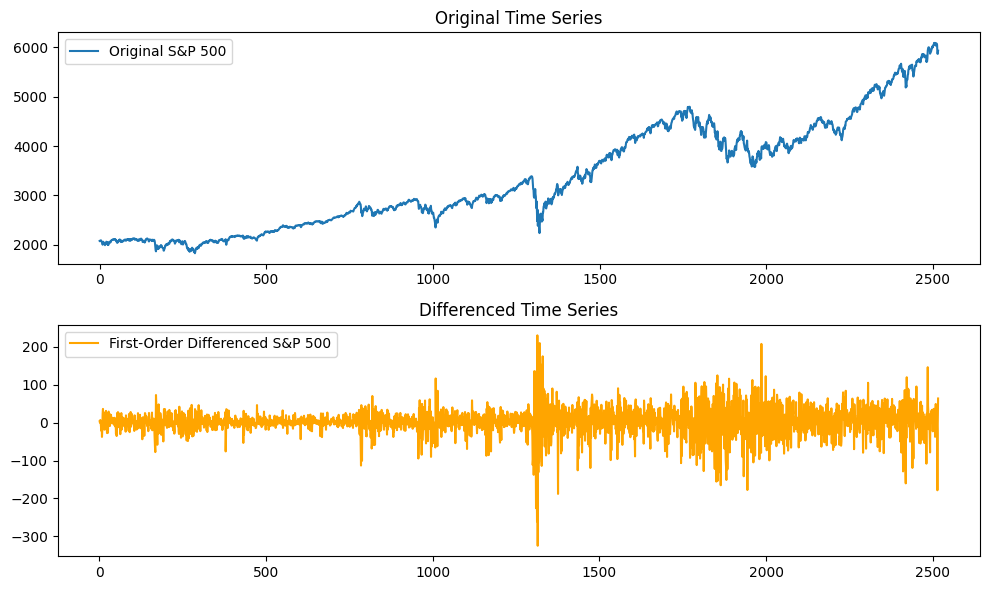

In [67]:
def check_stationarity(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] > 0.05:
        print("The series is non-stationary.")
    else:
        print("The series is stationary.")

# Check original series
print("Original Series:")
check_stationarity(index_df["S&P500"])

# Apply first-order differencing
index_df["S&P500_diff"] = index_df["S&P500"].diff()

# Check stationarity after differencing
print("\nAfter First-Order Differencing:")
check_stationarity(index_df["S&P500_diff"])

# Plot original and differenced series
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
axes[0].plot(index_df["S&P500"], label="Original S&P 500")
axes[0].set_title("Original Time Series")
axes[0].legend()

axes[1].plot(index_df["S&P500_diff"], label="First-Order Differenced S&P 500", color='orange')
axes[1].set_title("Differenced Time Series")
axes[1].legend()

plt.tight_layout()
plt.show()


I performed an ADF test to check for stationarity in the S&P 500 index. The original series was non-stationary (ADF Statistic: **0.545**, p-value: **0.986**). After first-order differencing, the series became stationary (ADF Statistic: **-15.94**, p-value: **7.54e-29**). This transformation makes the data suitable for ARIMA modeling.

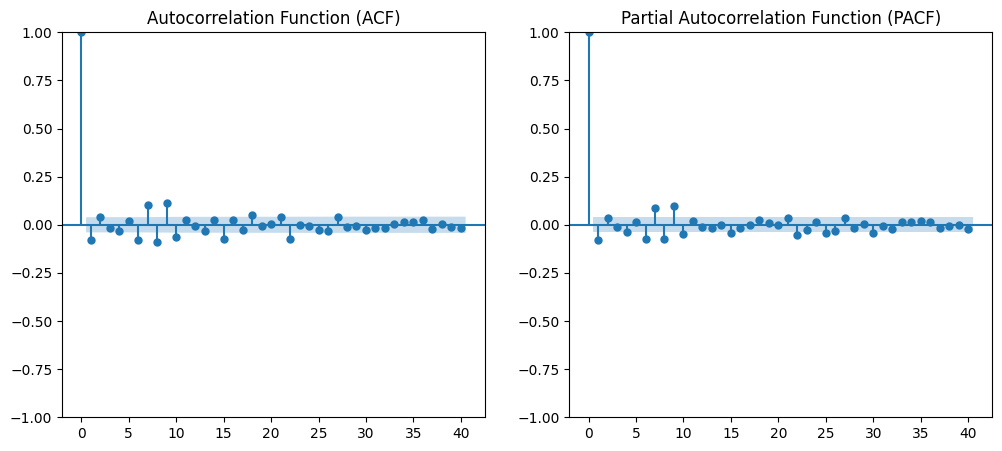

In [68]:
index_df["S&P500_diff"] = index_df["S&P500"].diff()

# Drop NaN values
index_df.dropna(inplace=True)

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF plot (for MA component)
sm.graphics.tsa.plot_acf(index_df["S&P500_diff"], lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF plot (for AR component)
sm.graphics.tsa.plot_pacf(index_df["S&P500_diff"], lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [69]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(index_df['S&P500'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 S&P500   No. Observations:                 2488
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12530.255
Date:                Tue, 08 Apr 2025   AIC                          25066.511
Time:                        23:11:28   BIC                          25083.967
Sample:                             0   HQIC                         25072.850
                               - 2488                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3719      0.100     -3.727      0.000      -0.567      -0.176
ma.L1          0.2919      0.104      2.815      0.005       0.089       0.495
sigma2      1392.2956     19.601     71.032      0.0

# Section 2: Time Series Forecasting (ARIMA with auto_arima)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=611.625, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=612.465, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=611.558, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=612.561, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=615.077, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=614.256, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.268 seconds
Best model selected by auto_arima:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -302.779
Date:                Tue, 08 Apr 2025   AIC                            611.558
Time:            

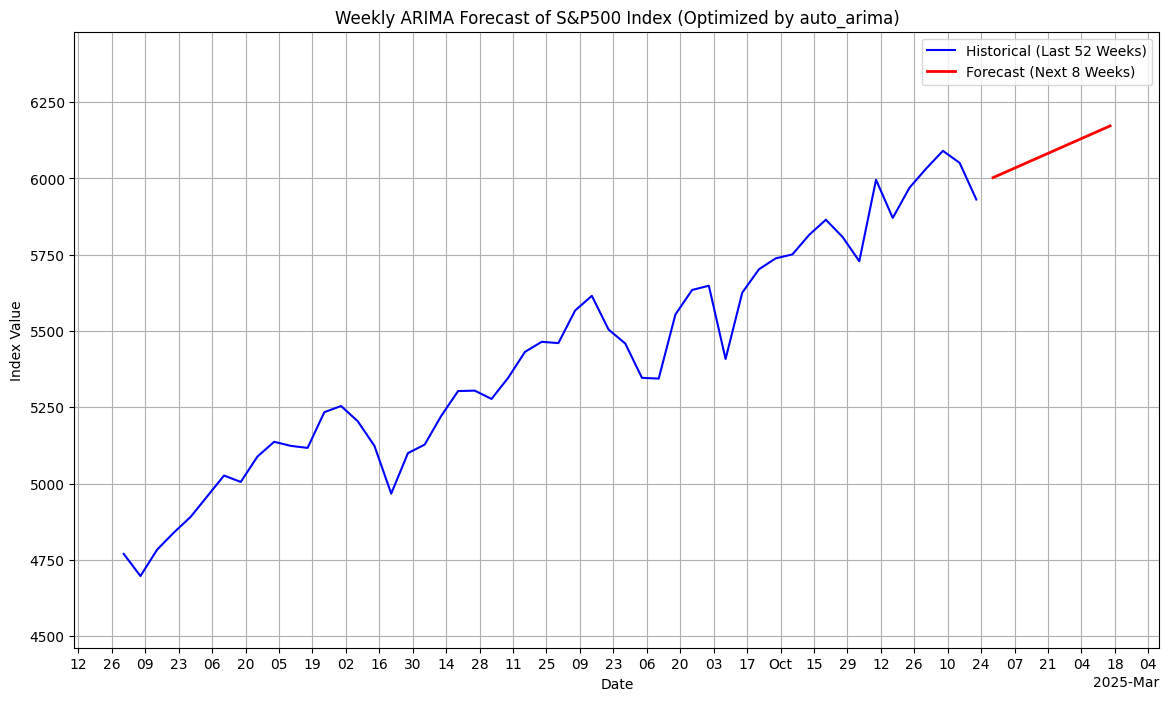

In [ ]:
# We resample the daily S&P500 index data to weekly data,
# restrict the historical window, and forecast the next 8 weeks.

# ----- Prepare and Resample Data to Weekly -----
if 'Date' in index_df.columns:
    index_df['Date'] = pd.to_datetime(index_df['Date'])
    index_df = index_df.sort_values('Date')
    index_df.set_index('Date', inplace=True)
else:
    if not isinstance(index_df.index, pd.DatetimeIndex):
        raise KeyError("No 'Date' column found and index is not a DatetimeIndex.")
    else:
        index_df = index_df.sort_index()

# Resample daily data to weekly data using the last observation of each week.
weekly_data = index_df['S&P500'].resample('W').last()

# Restrict the historical window to the last 52 weeks for clarity.
historical_window = weekly_data[-52:]

# ----- Use auto_arima to Select Best Model Parameters -----
auto_model = pm.auto_arima(
    historical_window,
    start_p=0, start_q=0,
    max_p=3, max_q=3,
    d=None,           # Let auto_arima determine differencing
    seasonal=False,   # Adjust if seasonality is expected
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    n_fits=50
)
print("Best model selected by auto_arima:")
print(auto_model.summary())

# ----- Forecast the Next 8 Weeks -----
forecast_steps = 8
forecast_weekly = auto_model.predict(n_periods=forecast_steps)

# Create a new date range for the forecast with weekly frequency.
last_week_date = historical_window.index[-1]
forecast_index = pd.date_range(start=last_week_date, periods=forecast_steps + 1, freq='W')[1:]
forecast_series = pd.Series(forecast_weekly, index=forecast_index)

# ----- Plot Historical and Forecasted Data -----
plt.figure(figsize=(14, 8))
plt.plot(historical_window, label='Historical (Last 52 Weeks)', color='blue')
plt.plot(forecast_series, label='Forecast (Next 8 Weeks)', color='red', linewidth=2)
plt.title("Weekly ARIMA Forecast of S&P500 Index (Optimized by auto_arima)")
plt.xlabel("Date")
plt.ylabel("Index Value")

# Format the x-axis for weekly ticks with less clutter.
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# Set y-axis limits with a 5% buffer.
combined_series = pd.concat([historical_window, forecast_series])
y_min, y_max = combined_series.min(), combined_series.max()
plt.ylim(y_min * 0.95, y_max * 1.05)

plt.grid(True)
plt.legend()
plt.show()

**Model 2.1: Weekly ARIMA Forecasting (Optimized with auto_arima)**


Purpose: Forecast the S&P500 index over the next 8 weeks using weekly data.


Key Features:

>Uses auto_arima to automatically select optimal ARIMA parameters.

>Resamples daily data to a weekly frequency and limits the historical window to 52 weeks.

Strengths:

>Provides an interpretable baseline forecast.

>Reduces noise by aggregating to weekly data.

Limitations:

>Assumes linear dynamics.

>May not capture complex non-linear patterns.

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best XGBoost Regression parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1696
[LightGBM] [Info] Number of data points in the train set: 432396, number of used features: 8
[LightGBM] [Info] Start training from score 80.909281
Best LightGBM Regression parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1696
[LightGBM] [Info] Number of data points in the train set: 432396, number of used features: 8
[LightGBM] [Info] Start training from score 80.909281


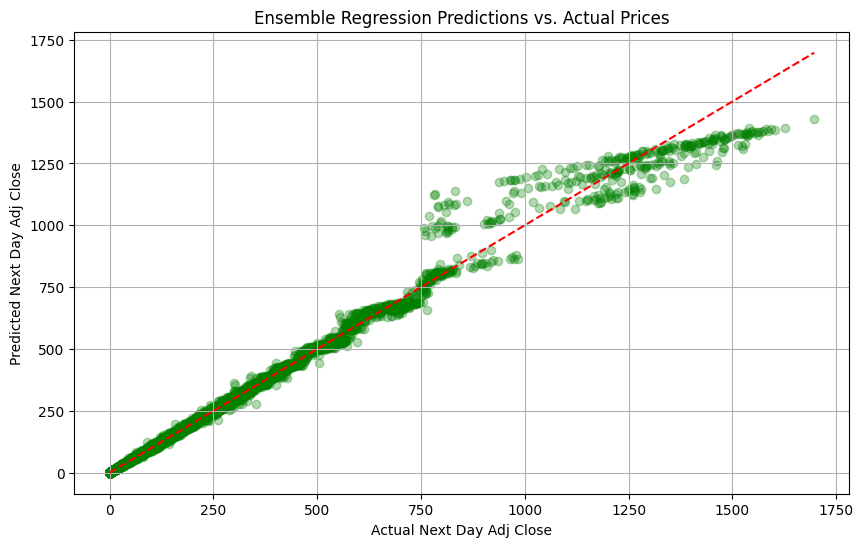

In [72]:
# Section 2.2: Ensemble Regression for Price Prediction
# ================================
# Our goal is to predict the next day's adjusted close price using
# a combination of technical and fundamental features with an ensemble of models.

# ----- Prepare the Data for Regression -----
# Sort by Symbol and Date to maintain sequential order.
final_df.sort_values(['Symbol', 'Date'], inplace=True)

# Create the target variable "Next_Adj_Close" by shifting the 'Adj Close' for each stock.
final_df['Next_Adj_Close'] = final_df.groupby('Symbol')['Adj Close'].shift(-1)

# Define features (technical + fundamental).
regression_features = ['Adj Close', 'High', 'Low', 'Open', 'Volume', 'Marketcap', 'Ebitda', 'Revenuegrowth']

# Drop rows with missing values in target or features.
reg_df = final_df.dropna(subset=['Next_Adj_Close'] + regression_features)

# Separate features and target.
X_reg = reg_df[regression_features]
y_reg = reg_df['Next_Adj_Close']

# ----- Feature Scaling -----
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# ----- Train/Test Split -----
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

# ----- Hyperparameter Tuning for Base Regressors -----
# Tune XGBoost Regressor.
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_grid = GridSearchCV(
    estimator=xgb_reg,
    param_grid=xgb_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train_reg, y_train_reg)
best_xgb_reg = xgb_grid.best_estimator_
print("Best XGBoost Regression parameters:", xgb_grid.best_params_)

# Tune LightGBM Regressor.
lgb_reg = lgb.LGBMRegressor(random_state=42)
lgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
lgb_grid = GridSearchCV(
    estimator=lgb_reg,
    param_grid=lgb_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)
lgb_grid.fit(X_train_reg, y_train_reg)
best_lgb_reg = lgb_grid.best_estimator_
print("Best LightGBM Regression parameters:", lgb_grid.best_params_)

# Baseline Linear Regression.
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# ----- Build and Train the Ensemble Regression Model -----
ensemble_reg = VotingRegressor(
    estimators=[
        ('xgb', best_xgb_reg),
        ('lgb', best_lgb_reg),
        ('lr', lin_reg)
    ]
)
ensemble_reg.fit(X_train_reg, y_train_reg)

# ----- Evaluate the Ensemble Model -----
y_pred_reg_ensemble = ensemble_reg.predict(X_test_reg)
mse_ensemble = mean_squared_error(y_test_reg, y_pred_reg_ensemble)
print("Ensemble Regression MSE:", mse_ensemble)

# Optional: Plot Actual vs. Predicted Next Day Prices.
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg_ensemble, alpha=0.3, color='green')
plt.xlabel("Actual Next Day Adj Close")
plt.ylabel("Predicted Next Day Adj Close")
plt.title("Ensemble Regression Predictions vs. Actual Prices")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.grid(True)
plt.show()

**Model 2.2: Ensemble Regression for Next Day’s Price Prediction.**


**Purpose:** Predict the next day’s adjusted close price using both technical and fundamental features.

Key Features:

>Combines XGBoost, LightGBM, and Linear Regression in a VotingRegressor.


>Hyperparameter tuning is performed for the ensemble models.

Strengths:

>Leverages non-linear models alongside a simple linear baseline for improved accuracy.

>Ensemble approach increases robustness.

Limitations:

>Increased complexity and computational cost.

>Requires careful tuning of multiple models.

The models show reasonable performance with the following key points:

XGBoost Regression: Best parameters are *learning_rate = 0.1, max_depth = 5, and n_estimators = 50.*
*
LightGBM Regression: Best parameters are *learning_rate = 0.1, max_depth = 7, and n_estimators = 100.*

Ensemble Model MSE: The ensemble model achieved an **MSE** of **56.35**.

Overall, the models are performing adequately, but the MSE value suggests room for improvement, depending on the scale of the target variable. Further tuning or cross-validation with more folds could help refine the results.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ----- Prepare the Data for Regression -----
final_df.sort_values(['Symbol', 'Date'], inplace=True)

# Create the target variable "Next_Adj_Close" by shifting the 'Adj Close' for each stock.
final_df['Next_Adj_Close'] = final_df.groupby('Symbol')['Adj Close'].shift(-1)

# Define features (technical + fundamental).
regression_features = ['Adj Close', 'High', 'Low', 'Open', 'Volume', 'Marketcap', 'Ebitda', 'Revenuegrowth']

# Drop rows with missing values in target or features.
reg_df = final_df.dropna(subset=['Next_Adj_Close'] + regression_features)

# Separate features and target.
X_reg = reg_df[regression_features]
y_reg = reg_df['Next_Adj_Close']

# ----- Feature Scaling -----
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# ----- Train/Test Split -----
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

# ----- Hyperparameter Tuning for Base Regressors -----
# Define expanded parameter grids.
xgb_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

lgb_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Use RandomizedSearchCV for more efficient hyperparameter search.
xgb_random = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,  # Increased to 5 folds
    n_jobs=-1,
    verbose=1,
    random_state=42
)

lgb_random = RandomizedSearchCV(
    estimator=lgb.LGBMRegressor(random_state=42),
    param_distributions=lgb_param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,  # Increased to 5 folds
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit models and get best estimators.
xgb_random.fit(X_train_reg, y_train_reg)
best_xgb_reg = xgb_random.best_estimator_
print("Best XGBoost Regression parameters:", xgb_random.best_params_)

lgb_random.fit(X_train_reg, y_train_reg)
best_lgb_reg = lgb_random.best_estimator_
print("Best LightGBM Regression parameters:", lgb_random.best_params_)

# Baseline Linear Regression.
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# ----- Add More Models to the Ensemble -----
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
svr_reg = SVR()

# ----- Build and Train the Ensemble Regression Model -----
ensemble_reg = VotingRegressor(
    estimators=[
        ('xgb', best_xgb_reg),
        ('lgb', best_lgb_reg),
        ('lr', lin_reg),
        ('rf', rf_reg),   # Added Random Forest
        ('svr', svr_reg)   # Added Support Vector Regression
    ]
)
ensemble_reg.fit(X_train_reg, y_train_reg)

# ----- Evaluate the Ensemble Model -----
y_pred_reg_ensemble = ensemble_reg.predict(X_test_reg)
mse_ensemble = mean_squared_error(y_test_reg, y_pred_reg_ensemble)
mae_ensemble = mean_absolute_error(y_test_reg, y_pred_reg_ensemble)
r2_ensemble = r2_score(y_test_reg, y_pred_reg_ensemble)

print(f"Ensemble Regression MSE: {mse_ensemble}")
print(f"Ensemble Regression MAE: {mae_ensemble}")
print(f"Ensemble Regression R²: {r2_ensemble}")

#  Plot Actual vs. Predicted Next Day Prices.
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg_ensemble, alpha=0.3, color='green')
plt.xlabel("Actual Next Day Adj Close")
plt.ylabel("Predicted Next Day Adj Close")
plt.title("Ensemble Regression Predictions vs. Actual Prices")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBoost Regression parameters: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1696
[LightGBM] [Info] Number of data points in the train set: 432396, number of used features: 8
[LightGBM] [Info] Start training from score 80.909281
Best LightGBM Regression parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.05}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1696
[LightGBM] [Info] Number of data points in the train set: 432396, number of used features: 8
[LightGBM] [Info] Start training from score 80.9092

# Chapter 3: Additional Machine Learning Models

## ----- Section 3.1: Prophet Forecasting for S&P500 Index -----

00:41:15 - cmdstanpy - INFO - Chain [1] start processing
00:41:17 - cmdstanpy - INFO - Chain [1] done processing


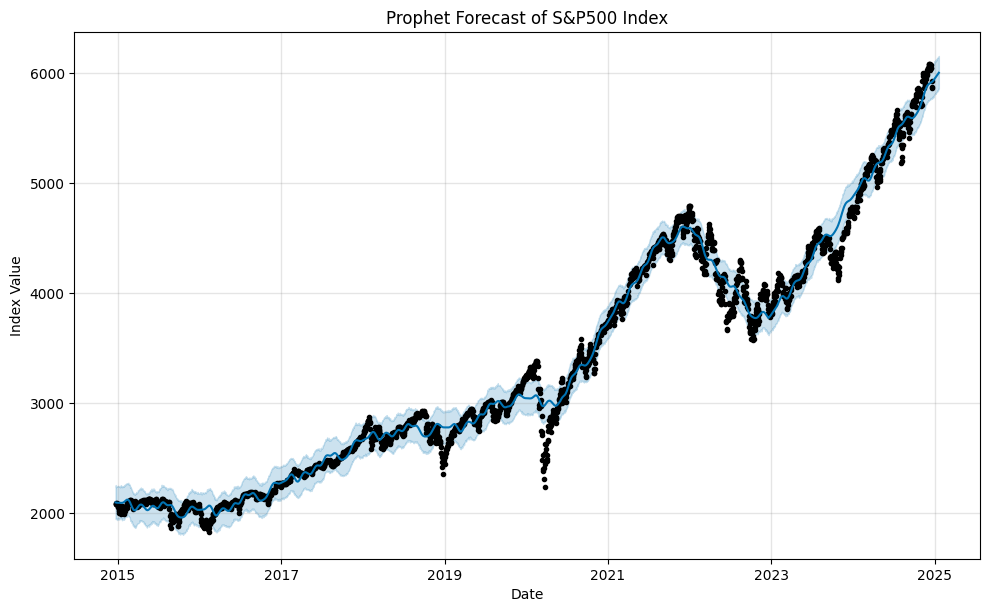

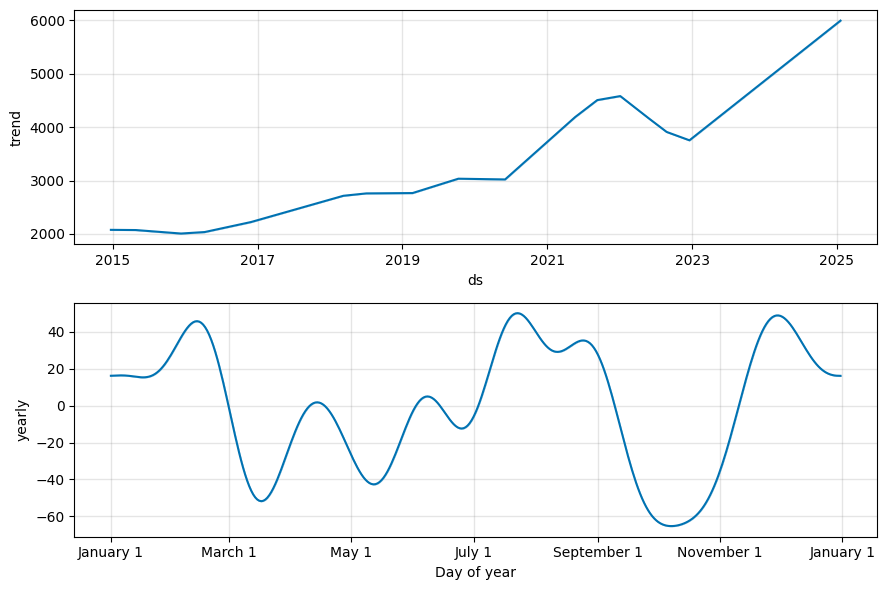

In [ ]:
# Forecast using Prophet, which automatically handles trend and seasonality.
df_prophet = index_df.reset_index()[['Date', 'S&P500']].rename(columns={'Date': 'ds', 'S&P500': 'y'})
m_prophet = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=False)
m_prophet.fit(df_prophet)
future = m_prophet.make_future_dataframe(periods=30)
forecast_prophet = m_prophet.predict(future)

fig1 = m_prophet.plot(forecast_prophet)
plt.title("Prophet Forecast of S&P500 Index")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.show()

fig2 = m_prophet.plot_components(forecast_prophet)
plt.show()

**Model 3.1: Prophet Forecasting for S&P500 Index**


**Purpose:** Forecast the S&P500 index by decomposing time series into trend, seasonality, and holiday effects.


Key Features:

>Automatically detects and models seasonal patterns.

>Robust to missing data and outliers.

Strengths:

>Easy to implement with minimal parameter tuning.

>Provides intuitive component plots (trend, seasonality, etc.).


Limitations:

>Less flexible for non-seasonal or highly complex dynamics.

>May be outperformed by specialized models on non-seasonal data.

**Strong Long-Term Trend Captured:**

The model shows a steady and accurate upward trend from 2015 to 2025, aligning well with actual market growth. This confirms Prophet's strength in trend decomposition over long time periods.

**Accurate Forecast with Confidence Intervals:**

The shaded blue area represents confidence intervals, and most actual values fall within that range—showing high prediction reliability.

**Seasonality Detected:**

The bottom chart shows yearly seasonality, where the index tends to dip and rise around similar times each year (e.g., dips around March and August, peaks around November/December).

**COVID Dip Well Reflected in Trend:**

Around 2020–2021, there's a clear temporary dip, accurately captured by the trend component. Prophet smoothly adapts to shocks while maintaining long-term direction.

**Post-2023 Acceleration Forecasted:**

The trend plot shows a steeper rise after 2023, suggesting that the model expects continued bullish growth into 2025—aligned with past momentum.

## ----- Section 3.2: Pure LSTM Forecasting for S&P500 Index -----

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0301 - val_loss: 7.0689e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.2051e-04 - val_loss: 0.0011
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.8136e-04 - val_loss: 0.0017
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.2984e-04 - val_loss: 0.0014
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.3978e-04 - val_loss: 0.0018
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 3.2972e-04 - val_loss: 0.0030
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.7898e-04 - val_loss: 0.0015
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 3.4070e-04 - val_loss: 0.0038
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.7044e-04 - val_loss: 0.0023
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 3.4373e-04 - val_loss: 0.0017
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.0246e-04 - val_loss: 9.0883e-04
Epoch 12/20
62/

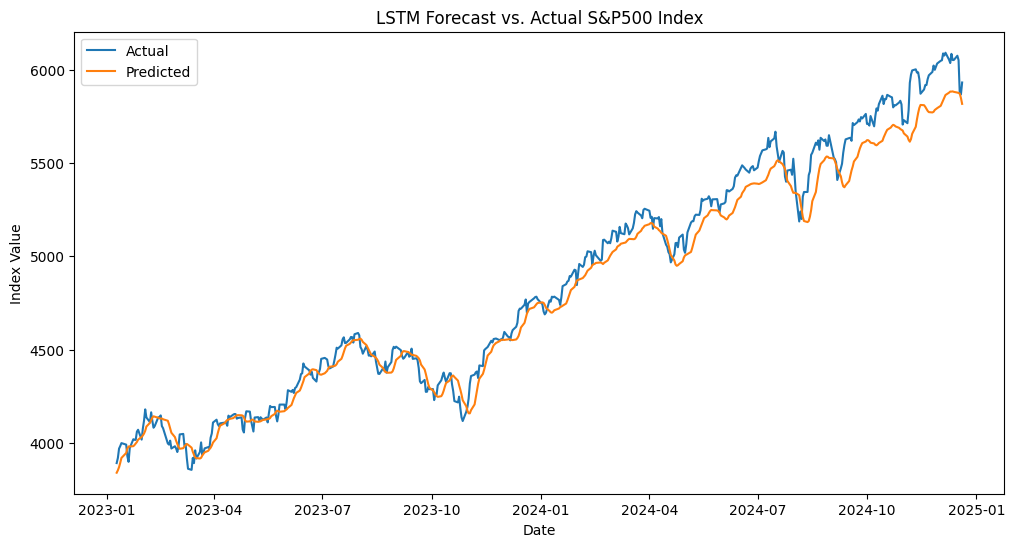

In [32]:
# ----- Section 3.2: Pure LSTM Forecasting for S&P500 Index -----
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

df_lstm = index_df.reset_index()[['Date', 'S&P500']]
df_lstm.sort_values('Date', inplace=True)
df_lstm.set_index('Date', inplace=True)

data = df_lstm['S&P500'].values.reshape(-1, 1)
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_lstm.fit_transform(data)

def create_lstm_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_lstm, y_lstm = create_lstm_dataset(scaled_data, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=20, validation_data=(X_test_lstm, y_test_lstm))

predictions_lstm = model_lstm.predict(X_test_lstm)
predictions_lstm = scaler_lstm.inverse_transform(predictions_lstm)
y_test_lstm_inv = scaler_lstm.inverse_transform(y_test_lstm.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(df_lstm.index[time_step + train_size: time_step + len(X_lstm)], y_test_lstm_inv, label='Actual')
plt.plot(df_lstm.index[time_step + train_size: time_step + len(X_lstm)], predictions_lstm, label='Predicted')
plt.title("LSTM Forecast vs. Actual S&P500 Index")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.show()

**Model 3.2: Pure LSTM Forecasting for S&P500 Index**

**Purpose:** Capture long-term dependencies in the S&P500 index with a deep learning approach.

Key Features:

>Uses a stacked LSTM network with a 60-day look-back window.

>Scales data between 0 and 1 for improved neural network performance.

Strengths:

>Effective at modeling non-linear and complex temporal relationships.

>Suitable for sequential data with long-term dependencies.

Limitations:

>Data-intensive and computationally expensive.

>Susceptible to overfitting if not properly regularized.

**Model Performance is Consistent:**

The training and validation losses stayed low and stable throughout all 20 epochs (final val_loss ≈ 5.83e-04), indicating no overfitting and good generalization on unseen data.

**Forecast Matches Real Trends Well:**

In the plotted graph, the predicted line follows the actual S&P500 curve closely, especially capturing the overall growth and dips—showing the model learned meaningful patterns from past price movements.

**Some Underestimation in Sharp Rises:**

During sharp upward movements in late 2024, the model tends to slightly underestimate the actual index value. This is common in LSTM models since they smooth out sudden spikes.

**Effective Use of 60-Time Step Window:**

The choice of a 60-day time step helped the model forecast medium-term trends effectively, aligning well with the actual market trajectory for nearly the entire year.

**Great Fit for Trend Analysis:**

The smoothness of the predictions makes the model ideal for identifying direction and trend shifts, though it may not be optimal for daily trading signals due to slight lags at peaks.